<a href="https://colab.research.google.com/github/sanjana514/CSE303-Project/blob/main/Project_Dengue_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 11YK42fMlUT4Vj73grRAQZK3BnaP-FfOo

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11YK42fMlUT4Vj73grRAQZK3BnaP-FfOo
To: /content/Dengue diseases dataset.csv
100% 35.9k/35.9k [00:00<00:00, 13.1MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Dengue diseases dataset.csv')

In [ ]:
df.head(20)

Age     Sex  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0    43    Male         12.6     2200.0                   1          1   
1    45    Male         13.2     3000.0                   0          1   
2    50  Female         11.0     3300.0                   1          1   
3    57  Female         11.9     3500.0                   1          0   
4    51  Female         13.0     3100.0                   0          1   
5    61    Male         15.0     3300.0                   1          1   
6     6   Child         11.0     2300.0                   1          0   
7    21    Male         14.0     2500.0                   1          1   
8    29    Male         15.0     2400.0                   1          1   
9    31  Female         14.2     3700.0                   0          1   
10   37  Female         13.6     2300.0                   1          0   
11   39    Male         15.6     2200.0                   1          1   
12   44    Male         12.9     2900.0                   0          1   
13   45  Female         11.7     3200.0                   1          1   
14   56    Male         15.2     3400.0                   1          0   
15   58    Male         14.7     3000.0                   0          1   
16   57  Female         15.3     3500.0                   1          1   
17   29    Male         13.3     2700.0                   1          1   
18   30    Male         14.2     2500.0                   0          1   
19   40    Male         14.7     2600.0                   1          1   

    Platelet Count   PDW  Final Output  
0          62000.0  11.0           1.0  
1          17000.0  17.0           1.0  
2          19000.0  16.3           1.0  
3          29000.0  14.0           1.0  
4          30000.0  14.5           1.0  
5          34000.0  20.0           1.0  
6          69000.0  12.5           1.0  
7          77000.0  13.3           1.0  
8          78000.0  14.5           1.0  
9          82000.0  15.6           1.0  
10         81000.0  16.7           1.0  
11         86000.0  17.3           1.0  
12         99000.0  18.2           1.0  
13        100000.0  19.0           1.0  
14        111000.0  19.3           1.0  
15        139000.0  19.5           1.0  
16        120000.0  11.9           1.0  
17        107000.0  12.0           1.0  
18        109000.0  12.2           1.0  
19         75000.0  13.5           1.0

In [ ]:
df['Final Output'] = df['Final Output'].replace( [1.0 , 0.0 ], [1,0] )


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1003 non-null   int64  
 1   Sex                 1003 non-null   object 
 2   Haemoglobin         1003 non-null   float64
 3   WBC Count           979 non-null    float64
 4   Differential Count  1003 non-null   int64  
 5   RBC PANEL           1003 non-null   int64  
 6   Platelet Count      986 non-null    float64
 7   PDW                 984 non-null    float64
 8   Final Output        989 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 70.7+ KB


## **Making a copy of main dataset as "df_rename"**

In [ ]:
df_rename = df.copy()

df_rename

Age     Sex  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0      43    Male         12.6     2200.0                   1          1   
1      45    Male         13.2     3000.0                   0          1   
2      50  Female         11.0     3300.0                   1          1   
3      57  Female         11.9     3500.0                   1          0   
4      51  Female         13.0     3100.0                   0          1   
...   ...     ...          ...        ...                 ...        ...   
998    27  Female         11.6     9400.0                   1          1   
999    19  Female         15.8     7400.0                   1          1   
1000   54  Female         11.9     7500.0                   1          1   
1001   34    Male         14.6     9500.0                   1          1   
1002   32    Male         12.8     6700.0                   1          1   

      Platelet Count   PDW  Final Output  
0            62000.0  11.0           1.0  
1            17000.0  17.0           1.0  
2            19000.0  16.3           1.0  
3            29000.0  14.0           1.0  
4            30000.0  14.5           1.0  
...              ...   ...           ...  
998         400000.0  39.9           0.0  
999         320560.0  56.0           0.0  
1000        345000.0  44.4           0.0  
1001        326000.0  41.9           0.0  
1002        175000.0  55.5           0.0  

[1003 rows x 9 columns]

In [ ]:
df_rename.dtypes

Age                     int64
Sex                    object
Haemoglobin           float64
WBC Count             float64
Differential Count      int64
RBC PANEL               int64
Platelet Count        float64
PDW                   float64
Final Output          float64
dtype: object

## **Finding the percentage of missing values percentage**

In [ ]:
missing_values = df.isna().sum()
missing_values_percent = 100 * df.isna().sum()/len(df)
print(missing_values_percent)
print(missing_values)

Age                   0.000000
Sex                   0.000000
Haemoglobin           0.000000
WBC Count             2.392822
Differential Count    0.000000
RBC PANEL             0.000000
Platelet Count        1.694915
PDW                   1.894317
Final Output          1.395813
dtype: float64
Age                    0
Sex                    0
Haemoglobin            0
WBC Count             24
Differential Count     0
RBC PANEL              0
Platelet Count        17
PDW                   19
Final Output          14
dtype: int64


## **Plotting the countdown of missing values**

<ipython-input-10-557c9a2e8083>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')


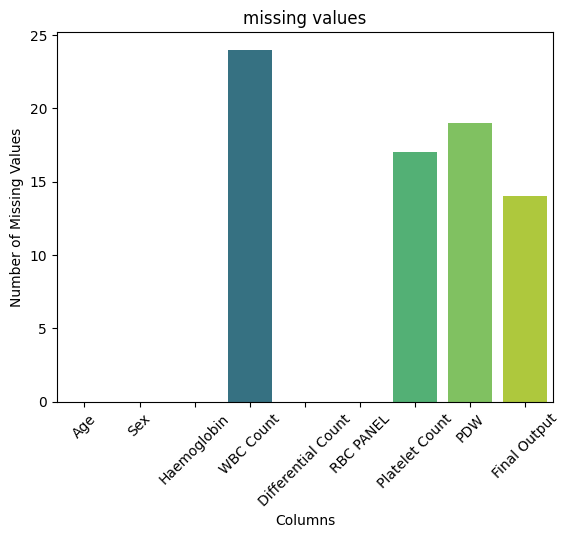

In [ ]:
missing_counts = df.isnull().sum()
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')
plt.title("missing values")
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

## **for NUMERICAL and BINARY DATATYPE**

# **Plot histogram on column "WBC Count" , "Platelet Count" , "PDW"** **and Plot count plot on column "Final Output" before filling the Null values**

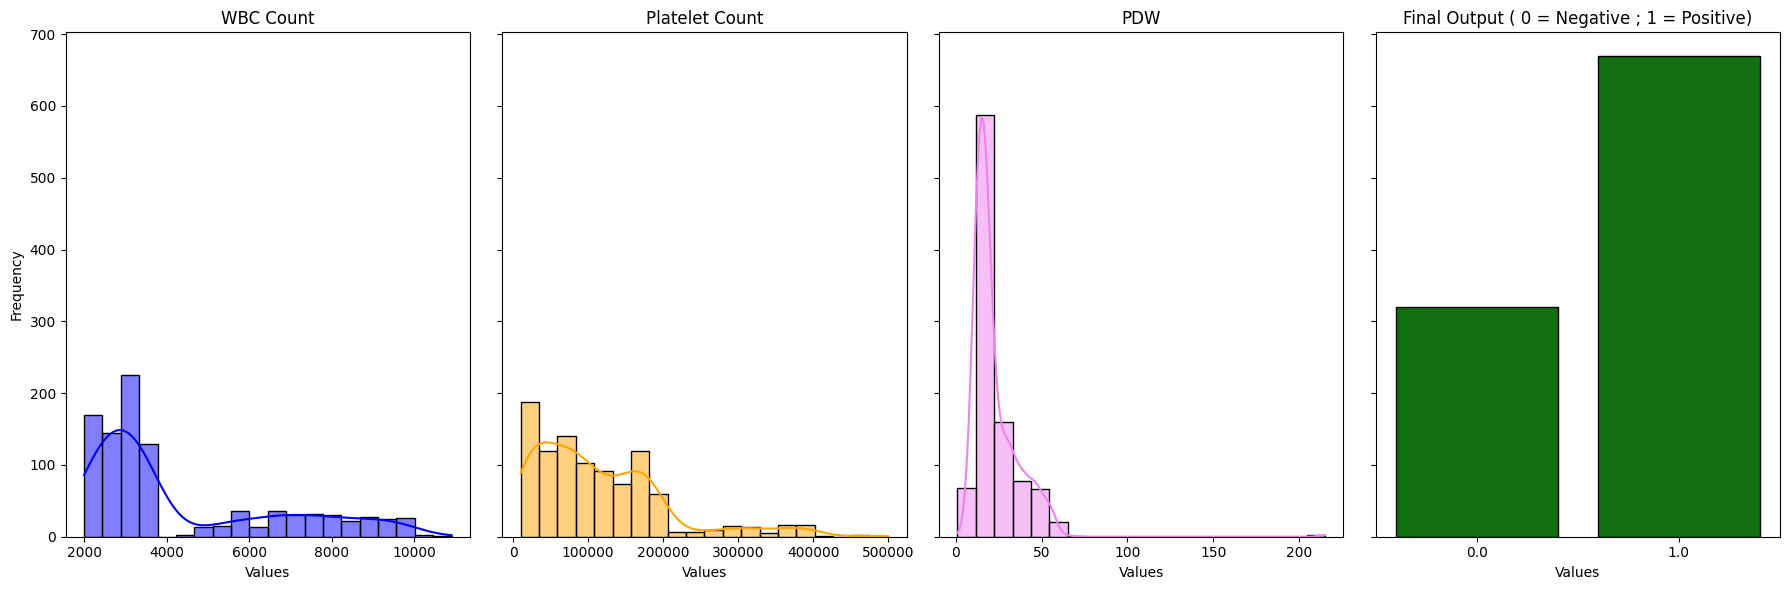

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Prepare data,
WBC_data = df['WBC Count']
Platelet_Count_data = df['Platelet Count']
PDW_data = df['PDW']
Final_Output = df['Final Output']

#Create the figure
fig, axs = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

#Plot WBC COUNT histogram
sns.histplot( WBC_data , bins=20, color='blue', edgecolor='black',kde = True, ax=axs[0])
axs[0].set_title('WBC Count')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

#Plot Platelet Count histogram
sns.histplot( Platelet_Count_data , bins=20, color='orange', edgecolor='black',kde = True, ax=axs[1])
axs[1].set_title('Platelet Count')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

#Plot WBC COUNT histogram
sns.histplot( PDW_data , bins=20, color='violet', edgecolor='black',kde = True, ax=axs[2])
axs[2].set_title('PDW')
axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')

#Plot Final Output countplot
sns.countplot( x = 'Final Output', data=df , color='green', edgecolor='black', ax=axs[3])
axs[3].set_title('Final Output ( 0 = Negative ; 1 = Positive)')
axs[3].set_xlabel('Values')
axs[3].set_ylabel('Frequency')

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

## **Filling the null values**

In [ ]:
# Fill the Numerical columns null values with Median
df_rename['WBC Count'] = df_rename['WBC Count'].fillna(df_rename['WBC Count'].median())
df_rename['Platelet Count'] = df_rename['Platelet Count'].fillna(df_rename['Platelet Count'].median())
df_rename['PDW'] = df_rename['PDW'].fillna(df_rename['PDW'].median())

# Fill the Categorical Binary columns with Mode
df_rename['Final Output'].fillna(df_rename['Final Output'].mode()[0], inplace = True)

df_rename

<ipython-input-12-b907fdf33499>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rename['Final Output'].fillna(df_rename['Final Output'].mode()[0], inplace = True)


Age     Sex  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0      43    Male         12.6     2200.0                   1          1   
1      45    Male         13.2     3000.0                   0          1   
2      50  Female         11.0     3300.0                   1          1   
3      57  Female         11.9     3500.0                   1          0   
4      51  Female         13.0     3100.0                   0          1   
...   ...     ...          ...        ...                 ...        ...   
998    27  Female         11.6     9400.0                   1          1   
999    19  Female         15.8     7400.0                   1          1   
1000   54  Female         11.9     7500.0                   1          1   
1001   34    Male         14.6     9500.0                   1          1   
1002   32    Male         12.8     6700.0                   1          1   

      Platelet Count   PDW  Final Output  
0            62000.0  11.0           1.0  
1            17000.0  17.0           1.0  
2            19000.0  16.3           1.0  
3            29000.0  14.0           1.0  
4            30000.0  14.5           1.0  
...              ...   ...           ...  
998         400000.0  39.9           0.0  
999         320560.0  56.0           0.0  
1000        345000.0  44.4           0.0  
1001        326000.0  41.9           0.0  
1002        175000.0  55.5           0.0  

[1003 rows x 9 columns]

## **Changing the datatype for columns necessary**

In [ ]:
df_rename['Final Output'] = df_rename['Final Output'].replace( [1.0 , 0.0 ], [1,0] )
df_rename['Final Output']=df_rename['Final Output'].astype(int)
df_rename['RBC PANEL'] = df_rename['RBC PANEL'].astype(int)

In [ ]:
df_rename

Age     Sex  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0      43    Male         12.6     2200.0                   1          1   
1      45    Male         13.2     3000.0                   0          1   
2      50  Female         11.0     3300.0                   1          1   
3      57  Female         11.9     3500.0                   1          0   
4      51  Female         13.0     3100.0                   0          1   
...   ...     ...          ...        ...                 ...        ...   
998    27  Female         11.6     9400.0                   1          1   
999    19  Female         15.8     7400.0                   1          1   
1000   54  Female         11.9     7500.0                   1          1   
1001   34    Male         14.6     9500.0                   1          1   
1002   32    Male         12.8     6700.0                   1          1   

      Platelet Count   PDW  Final Output  
0            62000.0  11.0             1  
1            17000.0  17.0             1  
2            19000.0  16.3             1  
3            29000.0  14.0             1  
4            30000.0  14.5             1  
...              ...   ...           ...  
998         400000.0  39.9             0  
999         320560.0  56.0             0  
1000        345000.0  44.4             0  
1001        326000.0  41.9             0  
1002        175000.0  55.5             0  

[1003 rows x 9 columns]

In [ ]:
df_rename.dtypes

Age                     int64
Sex                    object
Haemoglobin           float64
WBC Count             float64
Differential Count      int64
RBC PANEL               int64
Platelet Count        float64
PDW                   float64
Final Output            int64
dtype: object

## **The missing value count after filling the null values**

In [ ]:
missing_values = df_rename.isna().sum()
missing_values_percent = 100 * df_rename.isna().sum()/len(df)
print(missing_values_percent)
print(missing_values)

Age                   0.0
Sex                   0.0
Haemoglobin           0.0
WBC Count             0.0
Differential Count    0.0
RBC PANEL             0.0
Platelet Count        0.0
PDW                   0.0
Final Output          0.0
dtype: float64
Age                   0
Sex                   0
Haemoglobin           0
WBC Count             0
Differential Count    0
RBC PANEL             0
Platelet Count        0
PDW                   0
Final Output          0
dtype: int64


## **Plotting the missing value count after filling the null values**

<ipython-input-17-a7095093cc90>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')


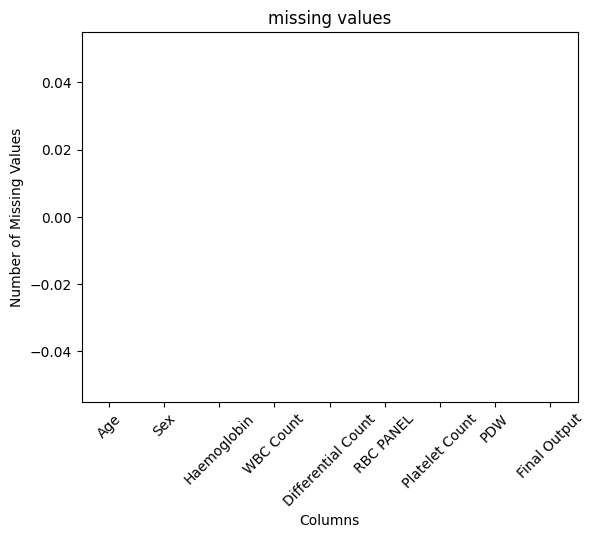

In [ ]:
missing_counts = df_rename.isnull().sum()
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')
plt.title("missing values")
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

## **Plotting Histogram After filling the Null values**

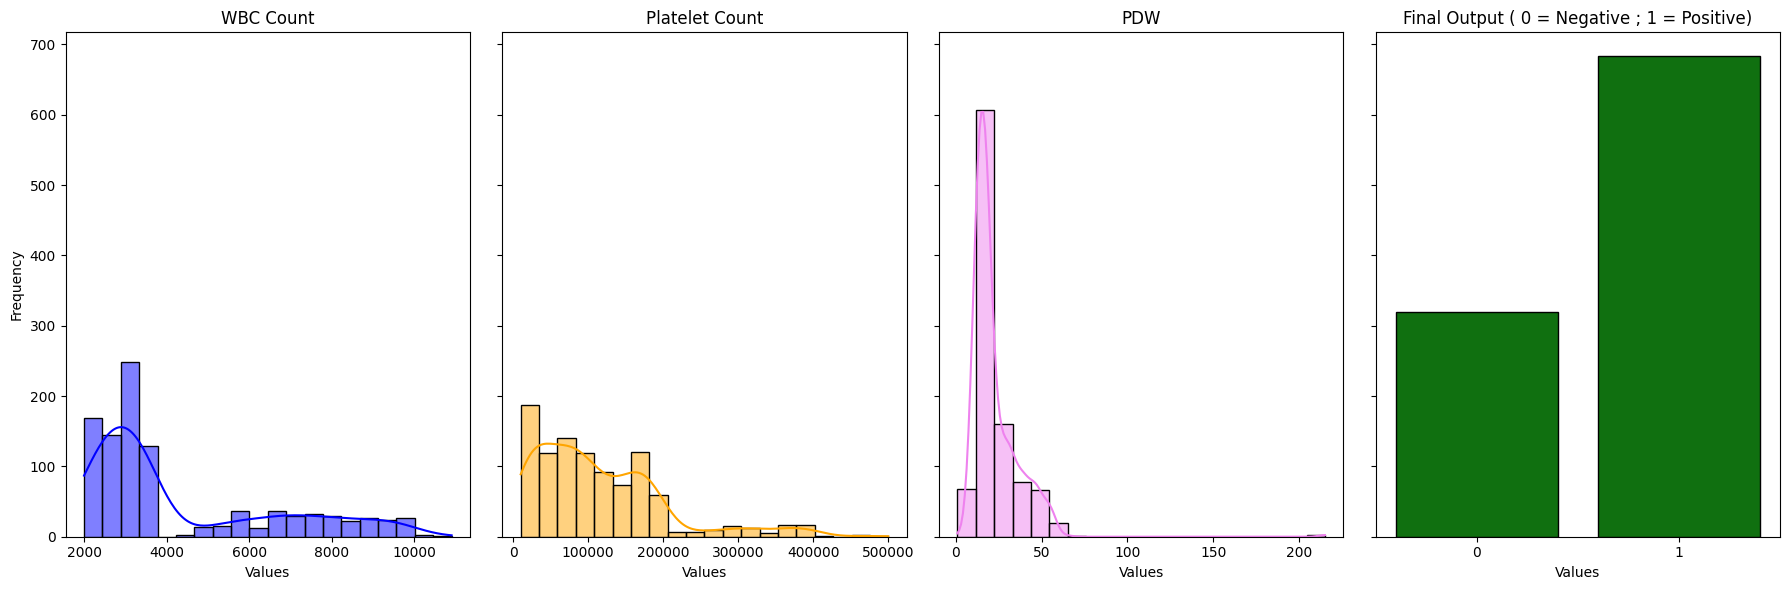

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Prepare data,
WBC_data = df_rename['WBC Count']
Platelet_Count_data = df_rename['Platelet Count']
PDW_data = df_rename['PDW']
Final_Output = df_rename['Final Output']

#Create the figure
fig, axs = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

#Plot WBC COUNT histogram
sns.histplot( WBC_data , bins=20, color='blue', edgecolor='black',kde = True, ax=axs[0])
axs[0].set_title('WBC Count')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

#Plot Platelet Count histogram
sns.histplot( Platelet_Count_data , bins=20, color='orange', edgecolor='black',kde = True, ax=axs[1])
axs[1].set_title('Platelet Count')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

#Plot WBC COUNT histogram
sns.histplot( PDW_data , bins=20, color='violet', edgecolor='black',kde = True, ax=axs[2])
axs[2].set_title('PDW')
axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')

#Plot Final Output countplot
sns.countplot( x = 'Final Output', data=df_rename , color='green', edgecolor='black', ax=axs[3])
axs[3].set_title('Final Output ( 0 = Negative ; 1 = Positive)')
axs[3].set_xlabel('Values')
axs[3].set_ylabel('Frequency')

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1003 non-null   int64  
 1   Sex                 1003 non-null   object 
 2   Haemoglobin         1003 non-null   float64
 3   WBC Count           979 non-null    float64
 4   Differential Count  1003 non-null   int64  
 5   RBC PANEL           1003 non-null   int64  
 6   Platelet Count      986 non-null    float64
 7   PDW                 984 non-null    float64
 8   Final Output        989 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 70.7+ KB


In [ ]:
df_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1003 non-null   int64  
 1   Sex                 1003 non-null   object 
 2   Haemoglobin         1003 non-null   float64
 3   WBC Count           1003 non-null   float64
 4   Differential Count  1003 non-null   int64  
 5   RBC PANEL           1003 non-null   int64  
 6   Platelet Count      1003 non-null   float64
 7   PDW                 1003 non-null   float64
 8   Final Output        1003 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 70.7+ KB


## **Compare through Histogram Before and After filling null values**

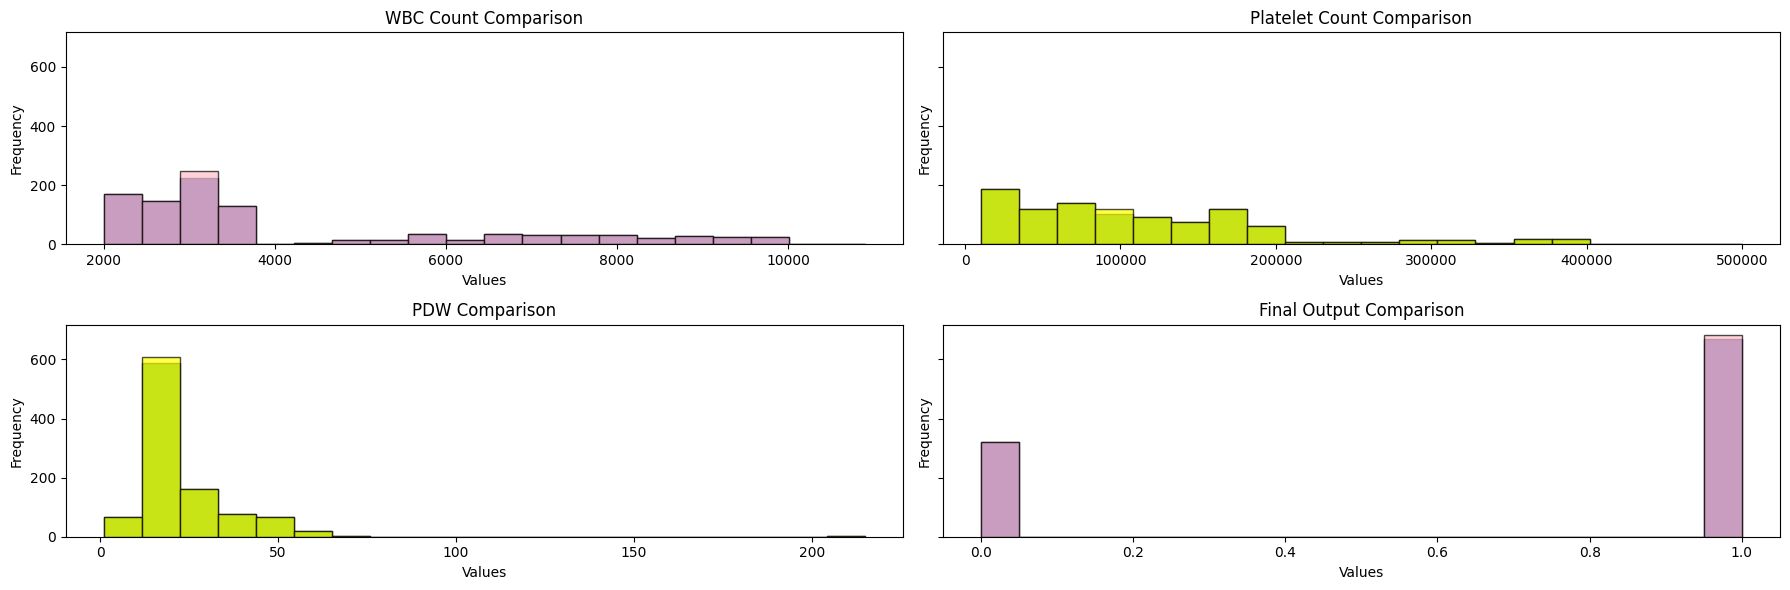

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create the figure
fig, axs = plt.subplots(2, 2, figsize=(18, 6), sharey=True)

#Plot WBC COUNT Before and After Cleaning Difference histogram

axs[0][0].hist(df['WBC Count'], bins=20, alpha=0.7, color='navy', edgecolor='black', label='WBC Count Before')
axs[0][0].hist(df_rename['WBC Count'], bins=20, alpha=0.7, color='pink', edgecolor='black', label='WBC Count After')

axs[0][0].set_title('WBC Count Comparison')
axs[0][0].set_xlabel('Values')
axs[0][0].set_ylabel('Frequency')

#Plot Platelet Count Before and After Cleaning Difference histogram

axs[0][1].hist(df['Platelet Count'], bins=20, alpha=0.7, color='green', edgecolor='black', label='Platelet Count Before')
axs[0][1].hist(df_rename['Platelet Count'], bins=20, alpha=0.7, color='yellow', edgecolor='black', label='Platelet Count After')

axs[0][1].set_title('Platelet Count Comparison')
axs[0][1].set_xlabel('Values')
axs[0][1].set_ylabel('Frequency')

#Plot WBC COUNT Before and After Cleaning Difference histogram

axs[1][0].hist(df['PDW'], bins=20, alpha=0.7, color='green', edgecolor='black', label='PDW Before')
axs[1][0].hist(df_rename['PDW'], bins=20, alpha=0.7, color='yellow', edgecolor='black', label='PDW After')

axs[1][0].set_title('PDW Comparison')
axs[1][0].set_xlabel('Values')
axs[1][0].set_ylabel('Frequency')

#Plot Final Output Before and After Cleaning Difference histogram

axs[1][1].hist(df['Final Output'], bins=20, alpha=0.7, color='navy', edgecolor='black', label='Final Output Before')
axs[1][1].hist(df_rename['Final Output'], bins=20, alpha=0.7, color='pink', edgecolor='black', label='Final Output After')

axs[1][1].set_title('Final Output Comparison')
axs[1][1].set_xlabel('Values')
axs[1][1].set_ylabel('Frequency')

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
missing_values = df_rename.isna().sum()
missing_values_percent = 100 * df_rename.isna().sum()/len(df)
print(missing_values_percent)
print(missing_values)

Age                   0.0
Sex                   0.0
Haemoglobin           0.0
WBC Count             0.0
Differential Count    0.0
RBC PANEL             0.0
Platelet Count        0.0
PDW                   0.0
Final Output          0.0
dtype: float64
Age                   0
Sex                   0
Haemoglobin           0
WBC Count             0
Differential Count    0
RBC PANEL             0
Platelet Count        0
PDW                   0
Final Output          0
dtype: int64


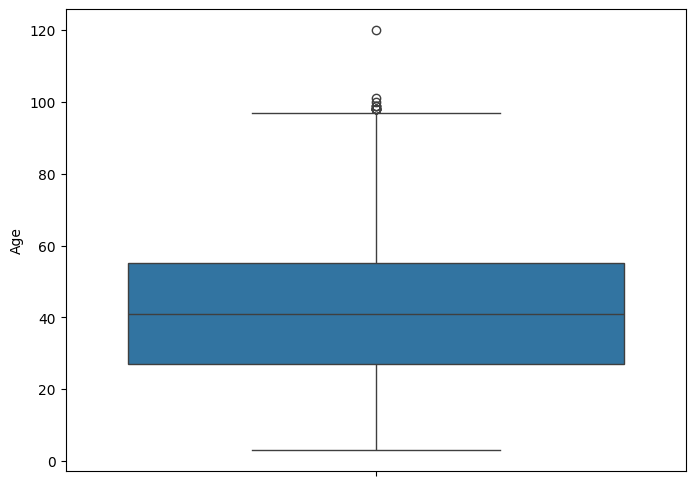

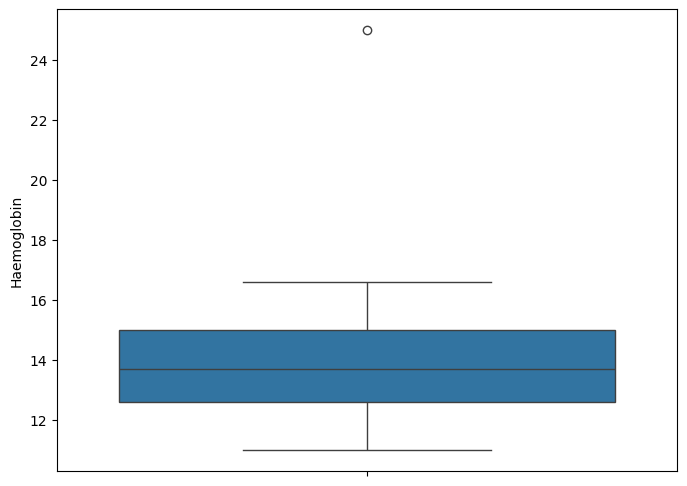

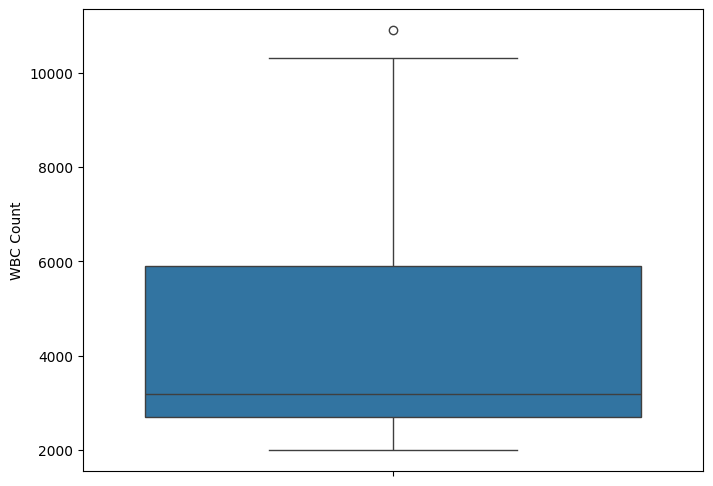

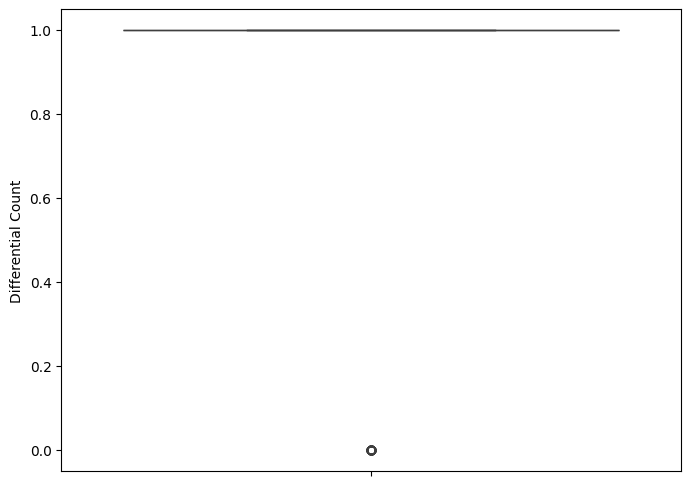

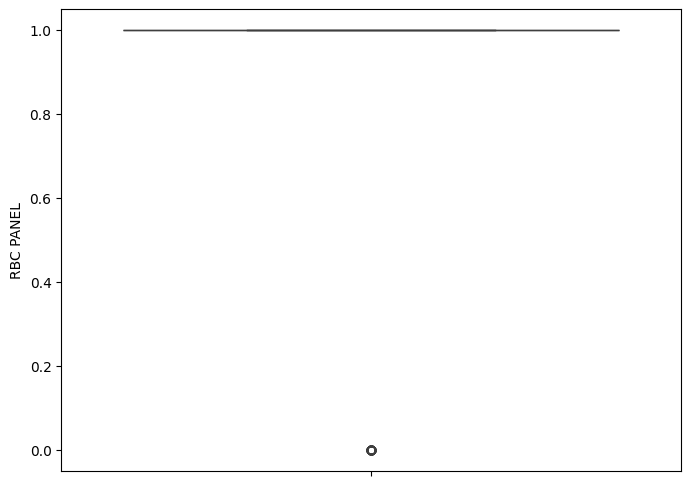

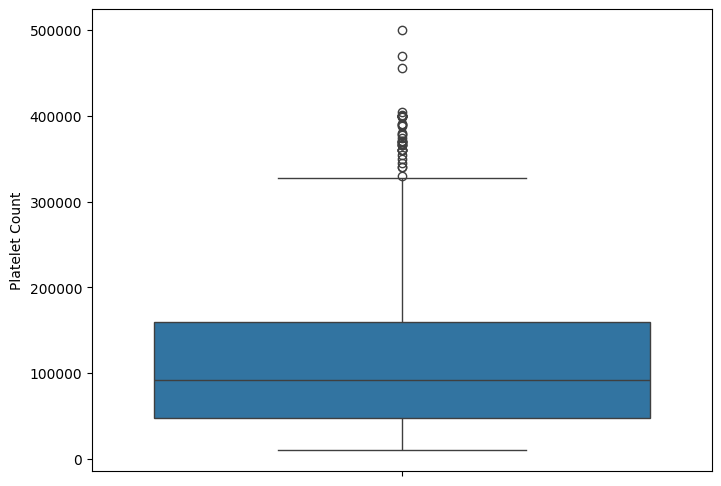

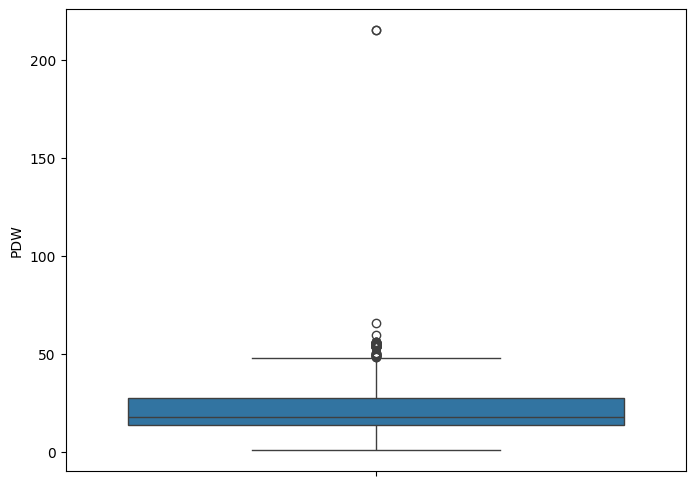

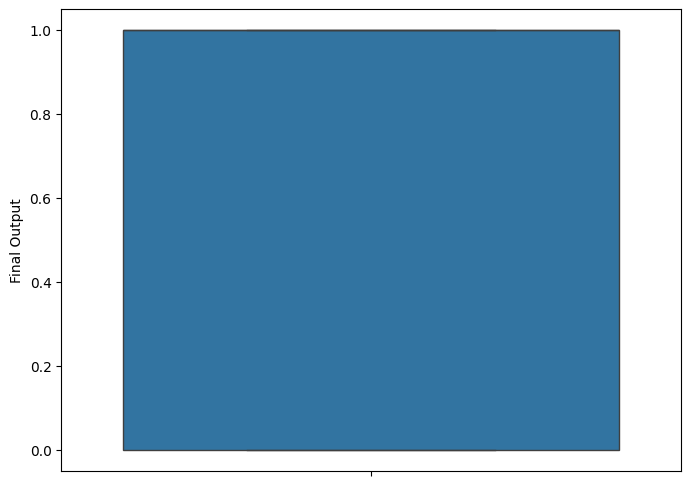

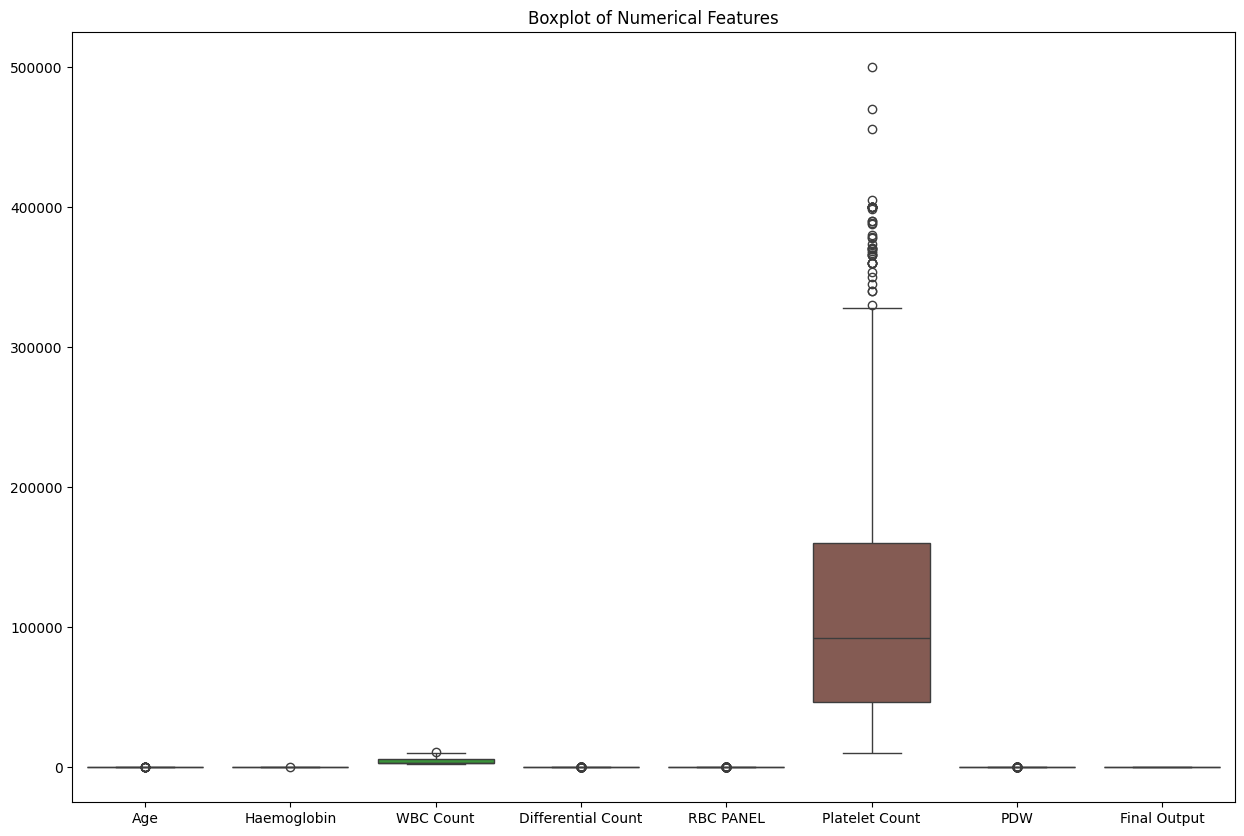

In [ ]:
for column in df_rename.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df_rename[column])
    plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_rename.select_dtypes(include=['int64','float64']))
plt.title('Boxplot of Numerical Features')
plt.show()

Removing outlier(Using capping to catch the values outside from the range and through it into the range)

   Age     Sex  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0   43    Male         12.6     2200.0                   1          1   
1   45    Male         13.2     3000.0                   0          1   
2   50  Female         11.0     3300.0                   1          1   
3   57  Female         11.9     3500.0                   1          0   
4   51  Female         13.0     3100.0                   0          1   

   Platelet Count   PDW  Final Output  
0         62000.0  11.0             1  
1         17000.0  17.0             1  
2         19000.0  16.3             1  
3         29000.0  14.0             1  
4         30000.0  14.5             1  


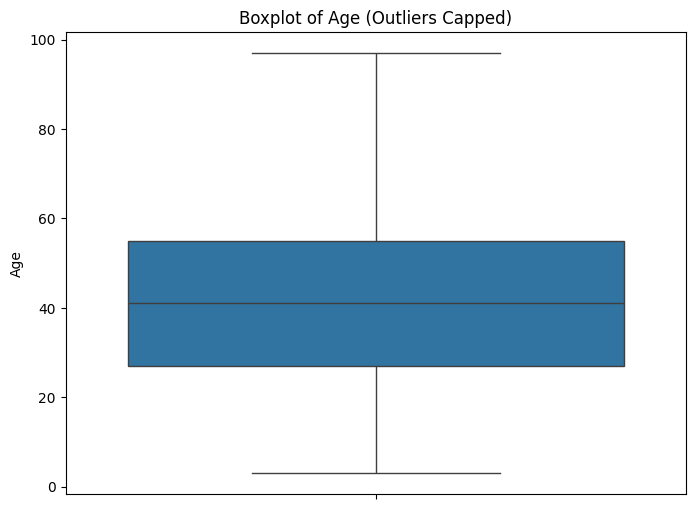

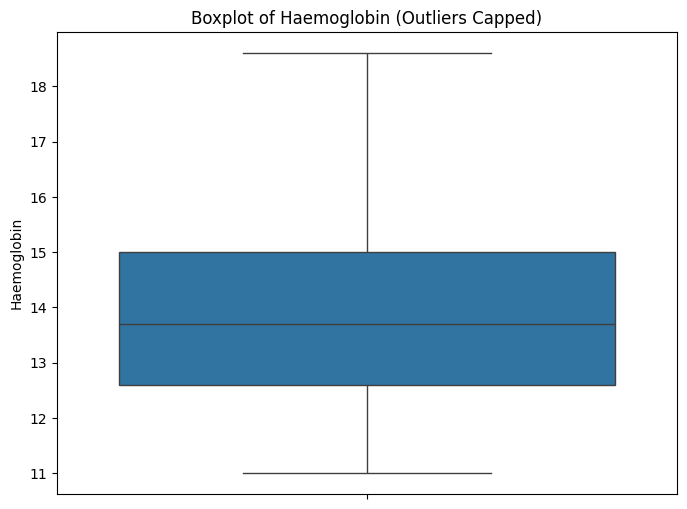

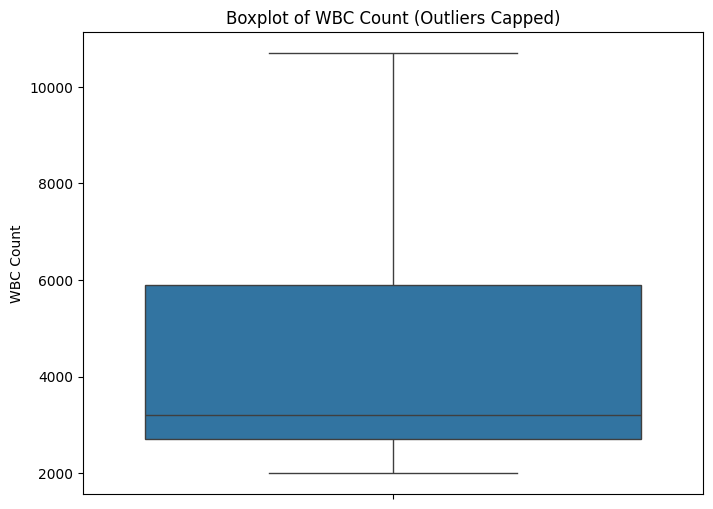

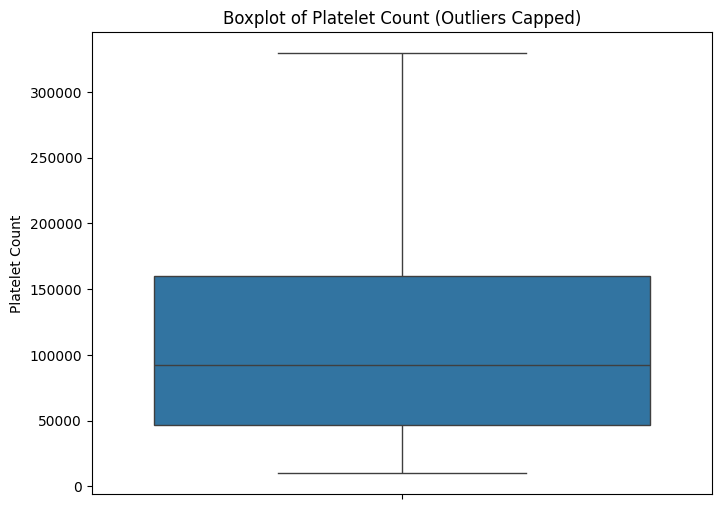

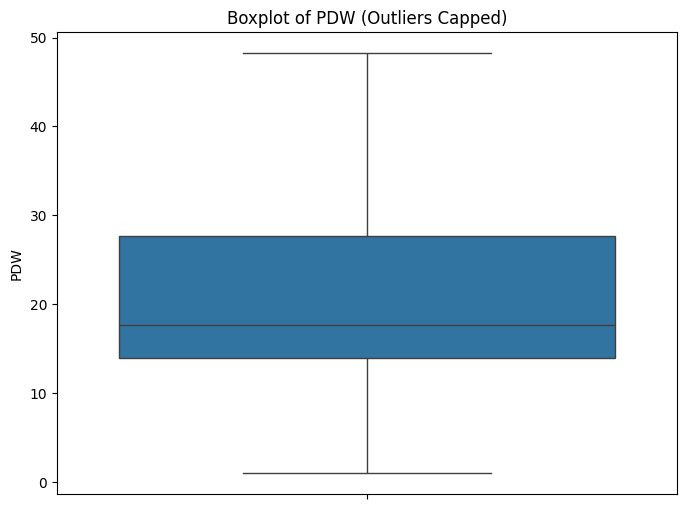

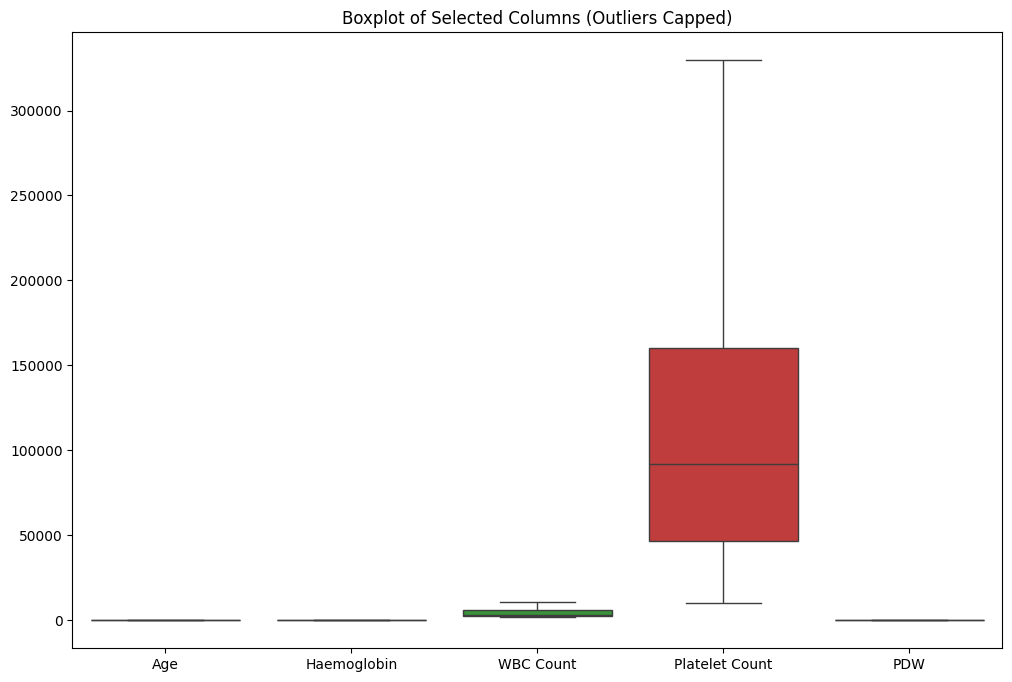

In [ ]:
import pandas as pd

# Function to cap outliers using IQR (Interquartile Range)
def cap_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for acceptable values
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds to the lower or upper threshold
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

# List of columns from which to cap outliers
columns_to_cap_outliers = ['Age', 'Haemoglobin', 'WBC Count', 'Platelet Count', 'PDW']

# Assuming df_rename is your original DataFrame, apply the cap_outliers function
df_capped = cap_outliers(df_rename, columns_to_cap_outliers)

# Display the first few rows of the capped DataFrame
print(df_capped.head())

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Generate individual boxplots for each column after capping outliers
for column in columns_to_cap_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df_capped[column])
    plt.title(f'Boxplot of {column} (Outliers Capped)')
    plt.show()

# Generate a combined boxplot for all selected columns after capping outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_capped[columns_to_cap_outliers])
plt.title('Boxplot of Selected Columns (Outliers Capped)')
plt.show()


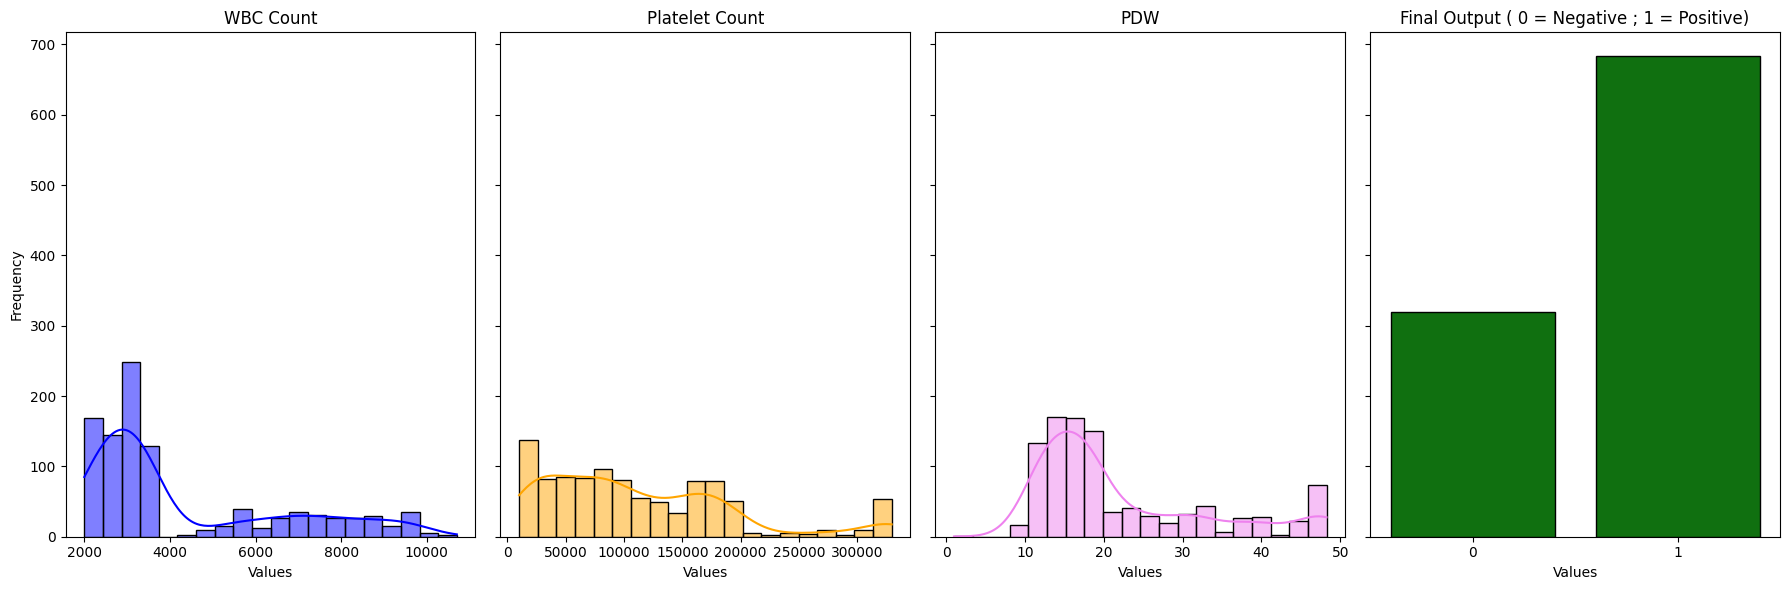

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Prepare data,
WBC_data = df_capped['WBC Count']
Platelet_Count_data = df_capped['Platelet Count']
PDW_data = df_capped['PDW']
Final_Output = df_capped['Final Output']

#Create the figure
fig, axs = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

#Plot WBC COUNT histogram
sns.histplot( WBC_data , bins=20, color='blue', edgecolor='black',kde = True, ax=axs[0])
axs[0].set_title('WBC Count')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

#Plot Platelet Count histogram
sns.histplot( Platelet_Count_data , bins=20, color='orange', edgecolor='black',kde = True, ax=axs[1])
axs[1].set_title('Platelet Count')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

#Plot WBC COUNT histogram
sns.histplot( PDW_data , bins=20, color='violet', edgecolor='black',kde = True, ax=axs[2])
axs[2].set_title('PDW')
axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')

#Plot Final Output countplot
sns.countplot( x = 'Final Output', data=df_capped , color='green', edgecolor='black', ax=axs[3])
axs[3].set_title('Final Output ( 0 = Negative ; 1 = Positive)')
axs[3].set_xlabel('Values')
axs[3].set_ylabel('Frequency')

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
df_rename.head(10)

Age     Sex  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0   43    Male         12.6     2200.0                   1          1   
1   45    Male         13.2     3000.0                   0          1   
2   50  Female         11.0     3300.0                   1          1   
3   57  Female         11.9     3500.0                   1          0   
4   51  Female         13.0     3100.0                   0          1   
5   61    Male         15.0     3300.0                   1          1   
6    6   Child         11.0     2300.0                   1          0   
7   21    Male         14.0     2500.0                   1          1   
8   29    Male         15.0     2400.0                   1          1   
9   31  Female         14.2     3700.0                   0          1   

   Platelet Count   PDW  Final Output  
0         62000.0  11.0             1  
1         17000.0  17.0             1  
2         19000.0  16.3             1  
3         29000.0  14.0             1  
4         30000.0  14.5             1  
5         34000.0  20.0             1  
6         69000.0  12.5             1  
7         77000.0  13.3             1  
8         78000.0  14.5             1  
9         82000.0  15.6             1

In [ ]:
df.to_csv('df_rename.csv')

#Feature Engineering

1.AGE GROUP

In [ ]:
# Example age bins and labels
bins = [0, 18, 40, 60, 100]  # Define the bin edges
labels = ['Child', 'Young Adult', 'Adult', 'Senior']  # Define the labels for each bin

# Assuming 'Age' is the column in your DataFrame
df_rename['Age Group'] = pd.cut(df_rename['Age'], bins=bins, labels=labels)

# Display the first few rows with the new column
print(df_rename[['Age', 'Age Group']].head(20))

    Age    Age Group
0    43        Adult
1    45        Adult
2    50        Adult
3    57        Adult
4    51        Adult
5    61       Senior
6     6        Child
7    21  Young Adult
8    29  Young Adult
9    31  Young Adult
10   37  Young Adult
11   39  Young Adult
12   44        Adult
13   45        Adult
14   56        Adult
15   58        Adult
16   57        Adult
17   29  Young Adult
18   30  Young Adult
19   40  Young Adult


2.Platelet Count Category

In [ ]:
# Define platelet count categories
bins = [0, 150000, 450000, float('inf')]  # Define the range for categories
labels = ['Low', 'Normal', 'High']        # Define the category labels

# Create the Platelet Count Category feature
df_rename['Platelet Count Category'] = pd.cut(df_rename['Platelet Count'], bins=bins, labels=labels)

# Display the first few rows with the new column
print(df_rename[['Platelet Count', 'Platelet Count Category']].head())


   Platelet Count Platelet Count Category
0         62000.0                     Low
1         17000.0                     Low
2         19000.0                     Low
3         29000.0                     Low
4         30000.0                     Low


3.Hemoglobin Deficiency Status

In [ ]:
# Function to determine hemoglobin deficiency status
def hemoglobin_status(row):
    # Assuming the column name is 'Sex' (or whatever it's called in your DataFrame)
    if row['Sex'] == 'Male':  # Changed 'Gender' to 'Sex'
        if row['Haemoglobin'] < 13:
            return 'Deficient'
        elif row['Haemoglobin'] > 17.5:
            return 'High'
        else:
            return 'Normal'
    elif row['Sex'] == 'Female':  # Changed 'Gender' to 'Sex'
        if row['Haemoglobin'] < 12:
            return 'Deficient'
        elif row['Haemoglobin'] > 16:
            return 'High'
        else:
            return 'Normal'
    else:  # For children
        if row['Haemoglobin'] < 11.5:
            return 'Deficient'
        elif row['Haemoglobin'] > 15.5:
            return 'High'
        else:
            return 'Normal'

# Apply the function to create the new feature
df_rename['Hemoglobin Deficiency Status'] = df_rename.apply(hemoglobin_status, axis=1)

# Display the first few rows with the new column
print(df_rename[['Sex', 'Haemoglobin', 'Hemoglobin Deficiency Status']].head()) # Changed 'Gender' to 'Sex')


      Sex  Haemoglobin Hemoglobin Deficiency Status
0    Male         12.6                    Deficient
1    Male         13.2                       Normal
2  Female         11.0                    Deficient
3  Female         11.9                    Deficient
4  Female         13.0                       Normal


4.WBC Count Category

In [ ]:
# Define WBC count categories
bins = [0, 4000, 11000, float('inf')]  # Define the ranges for WBC counts
labels = ['Low', 'Normal', 'High']     # Define the category labels

# Create the WBC Count Category feature
df_rename['WBC Count Category'] = pd.cut(df_rename['WBC Count'], bins=bins, labels=labels)

# Display the first few rows with the new column
print(df_rename[['WBC Count', 'WBC Count Category']].head())


   WBC Count WBC Count Category
0     2200.0                Low
1     3000.0                Low
2     3300.0                Low
3     3500.0                Low
4     3100.0                Low


5.PDW Risk Indicator

In [ ]:
# Define thresholds for PDW Risk Indicator
def pdw_risk_indicator(pdw_value):
    if 9 <= pdw_value <= 13:
        return 'Low Risk'
    else:
        return 'High Risk'

# Apply the function to create the new feature
df_rename['PDW Risk Indicator'] = df_rename['PDW'].apply(pdw_risk_indicator)

# Display the first few rows with the new column
print(df_rename[['PDW', 'PDW Risk Indicator']].head())



    PDW PDW Risk Indicator
0  11.0           Low Risk
1  17.0          High Risk
2  16.3          High Risk
3  14.0          High Risk
4  14.5          High Risk


6.Risk Score

In [ ]:
# Define the function to calculate composite risk score
def composite_risk_score(row):
    risk_score = 0

    # Platelet Count Risk
    if row['Platelet Count'] < 150000:
        risk_score += 1

    # PDW Risk
    if row['PDW'] < 9 or row['PDW'] > 13:
        risk_score += 1

    # WBC Count Risk
    if row['WBC Count'] < 4000 or row['WBC Count'] > 11000:
        risk_score += 1

    # Anemia Risk
    if row['Sex'] == 'Male' and row['Haemoglobin'] < 13:
        risk_score += 1
    elif row['Sex'] == 'Female' and row['Haemoglobin'] < 12:
        risk_score += 1
    elif row['Sex'] == 'Child' and row['Haemoglobin'] < 11.5:
        risk_score += 1

    return risk_score

# Apply the function to calculate the risk score for each row
df_rename['Composite Risk Score'] = df_rename.apply(composite_risk_score, axis=1)

# Display the first few rows with the new column
print(df_rename[['Platelet Count', 'PDW', 'WBC Count', 'Haemoglobin', 'Composite Risk Score']].head(20))


    Platelet Count   PDW  WBC Count  Haemoglobin  Composite Risk Score
0          62000.0  11.0     2200.0         12.6                     3
1          17000.0  17.0     3000.0         13.2                     3
2          19000.0  16.3     3300.0         11.0                     4
3          29000.0  14.0     3500.0         11.9                     4
4          30000.0  14.5     3100.0         13.0                     3
5          34000.0  20.0     3300.0         15.0                     3
6          69000.0  12.5     2300.0         11.0                     3
7          77000.0  13.3     2500.0         14.0                     3
8          78000.0  14.5     2400.0         15.0                     3
9          82000.0  15.6     3700.0         14.2                     3
10         81000.0  16.7     2300.0         13.6                     3
11         86000.0  17.3     2200.0         15.6                     3
12         99000.0  18.2     2900.0         12.9                     4
13    

In [ ]:
missing_values = df_rename.isna().sum()
missing_values_percent = 100 * df_rename.isna().sum()/len(df)
print(missing_values_percent)
print(missing_values)

Age                             0.0
Sex                             0.0
Haemoglobin                     0.0
WBC Count                       0.0
Differential Count              0.0
RBC PANEL                       0.0
Platelet Count                  0.0
PDW                             0.0
Final Output                    0.0
Age Group                       0.0
Platelet Count Category         0.0
Hemoglobin Deficiency Status    0.0
WBC Count Category              0.0
PDW Risk Indicator              0.0
Composite Risk Score            0.0
dtype: float64
Age                             0
Sex                             0
Haemoglobin                     0
WBC Count                       0
Differential Count              0
RBC PANEL                       0
Platelet Count                  0
PDW                             0
Final Output                    0
Age Group                       0
Platelet Count Category         0
Hemoglobin Deficiency Status    0
WBC Count Category              0
PDW

In [ ]:
df_rename.to_csv('df_rename.csv')

In [ ]:
df_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           1003 non-null   int64   
 1   Sex                           1003 non-null   object  
 2   Haemoglobin                   1003 non-null   float64 
 3   WBC Count                     1003 non-null   float64 
 4   Differential Count            1003 non-null   int64   
 5   RBC PANEL                     1003 non-null   int64   
 6   Platelet Count                1003 non-null   float64 
 7   PDW                           1003 non-null   float64 
 8   Final Output                  1003 non-null   int64   
 9   Age Group                     1003 non-null   category
 10  Platelet Count Category       1003 non-null   category
 11  Hemoglobin Deficiency Status  1003 non-null   object  
 12  WBC Count Category            1003 non-null   ca

# Testing

## Chi-Square Test

##Hypothesis-1

H0: There is no association between age group and hemoglobin deficiency status.

H1: There is an association between age group and hemoglobin deficiency status.



In [ ]:
import numpy as np
import scipy.stats as stats
#Chi-square test function
def chi_square_test(observed, alpha=0.05):
    chi2, p_value, dof, expected = stats.chi2_contingency(observed)
    critical_value = stats.chi2.ppf(1 - alpha, dof)
    reject_null = chi2 > critical_value

    return chi2, p_value, dof, expected, reject_null, critical_value

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df_rename['Age Group'], df_rename['Hemoglobin Deficiency Status'])
print(contingency_table)
# Calculate the test statistics
chi2, p_value, dof, expected, reject_null, critical_value = chi_square_test(contingency_table.values)
# Print the results
print("Chi-square Test Results:")
print(f"Chi-square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p_value}")
print(f"Critical Value (at alpha=0.05): {critical_value:.4f}")
print(f"Reject Null Hypothesis: {'Yes' if reject_null else 'No'}")
print("\nExpected Frequencies:")
print(expected)
# Interpretation
if reject_null:
    print("\nConclusion: There is a significant association between Age Group and Hemoglobin Deficiency Status.")
else:
    print("\nConclusion: There is no significant association between Age Group and Hemoglobin Deficiency Status.")

Hemoglobin Deficiency Status  Deficient  High  Normal
Age Group                                            
Child                                22     3      94
Young Adult                          95     0     287
Adult                                82     0     234
Senior                               61     0     125
Chi-square Test Results:
Chi-square Statistic: 30.002555982320562
Degrees of Freedom: 6
p-value: 3.926449173008075e-05
Critical Value (at alpha=0.05): 12.5916
Reject Null Hypothesis: Yes

Expected Frequencies:
[[ 30.84745763   0.3559322   87.79661017]
 [ 99.02293121   1.14257228 281.83449651]
 [ 81.91425723   0.94516451 233.14057827]
 [ 48.21535394   0.55633101 137.22831505]]

Conclusion: There is a significant association between Age Group and Hemoglobin Deficiency Status.


With df = 6 and a significance level of 0.05, we can compare this total calculated chi-square value to the critical chi-square value (approximately 12.591). Total Calculated Chi-Square (30.002) > Critical Chi-Square Value (12.591). Since the calculated chi-square statistic is greater than the critical value we reject the null hypothesis (H₀).There is a significant association between Age Group and Hemoglobin Deficiency Status. This means that the hemoglobin deficiency status varies significantly across different age groups.

## Hypothesis-2

H0: Age group does not influence composite risk score.

H1: Age group influences composite risk score.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df_rename['Age Group'], df_rename['Composite Risk Score'])
print(contingency_table)
# Calculate the test statistics
chi2, p_value, dof, expected, reject_null, critical_value = chi_square_test(contingency_table.values)
# Print the results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p_value:.4f}")
print(f"Critical Value (at alpha=0.05): {critical_value:.4f}")
print(f"Reject Null Hypothesis: {'Yes' if reject_null else 'No'}")
print("\nExpected Frequencies:")
print(expected)
# Interpretation
if reject_null:
    print("\nAge group influences composite risk score.")
else:
    print("\nAge group does not influence composite risk score.")

Composite Risk Score   0   1   2    3   4
Age Group                                
Child                  0  20  18   67  14
Young Adult           11  71  82  174  44
Adult                 12  50  48  157  49
Senior                24  53  30   53  26
Chi-Square Test Results:
Chi-Square Statistic: 69.6009
Degrees of Freedom: 12
p-value: 0.0000
Critical Value (at alpha=0.05): 21.0261
Reject Null Hypothesis: Yes

Expected Frequencies:
[[  5.57627119  23.01694915  21.11864407  53.50847458  15.77966102]
 [ 17.9002991   73.88634098  67.79262213 171.7666999   50.65403789]
 [ 14.80757727  61.12063809  56.07976072 142.08973081  41.90229312]
 [  8.71585244  35.97607178  33.00897308  83.63509472  24.66400798]]

Age group influences composite risk score.


Based on the Chi-square test results, we analyze the relationship between Age Group and Composite Risk Score.The calculated Chi-square statistic is 69.6009, which is much larger than the critical value of 21.0261 (at
α=0.05).The p-value is 0.0000, which is less than the significance level (α=0.05). This indicates strong evidence against the null hypothesis.Since the p-value is extremely small and the Chi-square statistic exceeds the critical value, we reject the null hypothesis.This means that age group significantly influences the composite risk score. In other words, the distribution of composite risk scores varies significantly across different age groups.

## Hypothesis-3

H0: Platelet count category has no association with PDW risk indicator.

H1: Platelet count category is associated with PDW risk indicator.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df_rename['Platelet Count Category'], df_rename['PDW Risk Indicator'])
print(contingency_table)
# Calculate the test statistics
chi2, p_value, dof, expected, reject_null, critical_value = chi_square_test(contingency_table.values)
# Print the results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p_value:.4f}")
print(f"Critical Value (at alpha=0.05): {critical_value:.4f}")
print(f"Reject Null Hypothesis: {'Yes' if reject_null else 'No'}")
print("\nExpected Frequencies:")
print(expected)
# Interpretation
if reject_null:
    print("\nPlatelet count category is associated with PDW risk indicator.")
else:
    print("\nPlatelet count category has no association with PDW risk indicator.")

PDW Risk Indicator       High Risk  Low Risk
Platelet Count Category                     
Low                            556       140
Normal                         236        71
Chi-Square Test Results:
Chi-Square Statistic: 0.9893
Degrees of Freedom: 1
p-value: 0.3199
Critical Value (at alpha=0.05): 3.8415
Reject Null Hypothesis: No

Expected Frequencies:
[[549.58325025 146.41674975]
 [242.41674975  64.58325025]]

Platelet count category has no association with PDW risk indicator.


The Chi-Square test results indicate a Chi-Square Statistic of 0.9893 with 1 degree of freedom and a p-value of 0.3199, which is greater than the significance level (α=0.05). Since the p-value exceeds the critical threshold, we fail to reject the null hypothesis (H0).

This means there is no statistically significant association between platelet count category and the PDW risk indicator. The observed differences between the groups can be attributed to random variation rather than a meaningful relationship. Thus, we conclude that platelet count category does not influence the PDW risk indicator based on the provided data.









##Hypothesis-4

H0: There is no association between sex and WBC count category.

H1: There is an association between sex and WBC count category.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df_rename['Sex'], df_rename['WBC Count Category'])
print(contingency_table)
# Calculate the test statistics
chi2, p_value, dof, expected, reject_null, critical_value = chi_square_test(contingency_table.values)
# Print the results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p_value:.4f}")
print(f"Critical Value (at alpha=0.05): {critical_value:.4f}")
print(f"Reject Null Hypothesis: {'Yes' if reject_null else 'No'}")
print("\nExpected Frequencies:")
print(expected)
# Interpretation
if reject_null:
    print("\nThere is an association between sex and WBC count category.")
else:
    print("\nThere is no association between sex and WBC count category.")

WBC Count Category  Low  Normal
Sex                            
Child                27       8
Female              299     151
Male                366     152
Chi-Square Test Results:
Chi-Square Statistic: 3.1229
Degrees of Freedom: 2
p-value: 0.2098
Critical Value (at alpha=0.05): 5.9915
Reject Null Hypothesis: No

Expected Frequencies:
[[ 24.14755733  10.85244267]
 [310.46859422 139.53140578]
 [357.38384845 160.61615155]]

There is no association between sex and WBC count category.


The Chi-Square test shows a Chi-Square Statistic of 3.1229 with 2 degrees of freedom and a p-value of 0.2098, which is greater than the significance level (α=0.05). Since the p-value exceeds the critical value, we fail to reject the null hypothesis (H0).

This indicates that there is no statistically significant association between sex and WBC count category. The observed differences are likely due to random variation rather than a meaningful relationship.

## Hypothesis-5

H0: Hemoglobin deficiency status is independent of PDW risk indicator.

H1: Hemoglobin deficiency status is dependent on PDW risk indicator.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df_rename['Hemoglobin Deficiency Status'], df_rename['PDW Risk Indicator'])
print(contingency_table)
# Calculate the test statistics
chi2, p_value, dof, expected, reject_null, critical_value = chi_square_test(contingency_table.values)
# Print the results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p_value:.4f}")
print(f"Critical Value (at alpha=0.05): {critical_value:.4f}")
print(f"Reject Null Hypothesis: {'Yes' if reject_null else 'No'}")
print("\nExpected Frequencies:")
print(expected)
# Interpretation
if reject_null:
    print("\nHemoglobin deficiency status is dependent on PDW risk indicator.")
else:
    print("\nHemoglobin deficiency status is independent of PDW risk indicator.")

PDW Risk Indicator            High Risk  Low Risk
Hemoglobin Deficiency Status                     
Deficient                           195        65
High                                  3         0
Normal                              594       146
Chi-Square Test Results:
Chi-Square Statistic: 4.0187
Degrees of Freedom: 2
p-value: 0.1341
Critical Value (at alpha=0.05): 5.9915
Reject Null Hypothesis: No

Expected Frequencies:
[[205.30408774  54.69591226]
 [  2.36889332   0.63110668]
 [584.32701894 155.67298106]]

Hemoglobin deficiency status is independent of PDW risk indicator.


With df = 2 and a significance level of 0.05, we can compare this total calculated chi-square value to the critical chi-square value (approximately 5.9915). Total Calculated Chi-Square (4.0187) < Critical Chi-Square Value (5.9915). Since the calculated chi-square statistic is less than the critical value we can not reject the null hypothesis (H₀).There is no significant association between Hemoglobin Deficiency Status and PDW risk indicator. This means that the hemoglobin deficiency status is independent of PDW risk indicator.

## Hypothesis-6

H0: There is no relationship between WBC count category and platelet count category.

H1: There is a relationship between WBC count category and platelet count category.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df_rename['WBC Count Category'], df_rename['Platelet Count Category'])
print(contingency_table)
# Calculate the test statistics
chi2, p_value, dof, expected, reject_null, critical_value = chi_square_test(contingency_table.values)
# Print the results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p_value:.4f}")
print(f"Critical Value (at alpha=0.05): {critical_value:.4f}")
print(f"Reject Null Hypothesis: {'Yes' if reject_null else 'No'}")
print("\nExpected Frequencies:")
print(expected)
# Interpretation
if reject_null:
    print("\nThere is a relationship between WBC count category and platelet count category..")
else:
    print("\nThere is no relationship between WBC count category and platelet count category.")

Platelet Count Category  Low  Normal
WBC Count Category                  
Low                      682      10
Normal                    14     297
Chi-Square Test Results:
Chi-Square Statistic: 889.2282
Degrees of Freedom: 1
p-value: 0.0000
Critical Value (at alpha=0.05): 3.8415
Reject Null Hypothesis: Yes

Expected Frequencies:
[[480.19142572 211.80857428]
 [215.80857428  95.19142572]]

There is a relationship between WBC count category and platelet count category..


The chi-square test shows a significant relationship between WBC count and platelet count categories (p<0.05). The null hypothesis is rejected, indicating that changes in WBC counts are associated with platelet count variations.

## Hypothesis-7

H0: Sex and PDW risk indicator are independent of each other.

H1: Sex and PDW risk indicator are not independent of each other.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df_rename['Sex'], df_rename['PDW Risk Indicator'])
print(contingency_table)
# Calculate the test statistics
chi2, p_value, dof, expected, reject_null, critical_value = chi_square_test(contingency_table.values)
# Print the results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p_value:.4f}")
print(f"Critical Value (at alpha=0.05): {critical_value:.4f}")
print(f"Reject Null Hypothesis: {'Yes' if reject_null else 'No'}")
print("\nExpected Frequencies:")
print(expected)
# Interpretation
if reject_null:
    print("\n Sex and PDW risk indicator are not independent of each other.")
else:
    print("\nSex and PDW risk indicator are independent of each other.")

PDW Risk Indicator  High Risk  Low Risk
Sex                                    
Child                      26         9
Female                    350       100
Male                      416       102
Chi-Square Test Results:
Chi-Square Statistic: 1.4063
Degrees of Freedom: 2
p-value: 0.4950
Critical Value (at alpha=0.05): 5.9915
Reject Null Hypothesis: No

Expected Frequencies:
[[ 27.63708873   7.36291127]
 [355.33399801  94.66600199]
 [409.02891326 108.97108674]]

Sex and PDW risk indicator are independent of each other.


The chi-square test shows no significant relationship between sex and the PDW risk indicator, as the p-value (0.4950) is greater than the significance level of 0.05. The chi-square statistic (1.4063) is also below the critical value (5.9915). Therefore, we fail to reject the null hypothesis and conclude that sex and the PDW risk indicator are independent.

# Z-test

## Hypothesis-8

H0: The mean WBC count for male and female patients is equal.

H1: The mean WBC count for male and female patients is different


In [ ]:
from statsmodels.stats.weightstats import ztest
# Step 2: Separate the WBC count data for males and females
male_wbc = df_rename[df_rename['Sex'] == 'Male']['WBC Count']
female_wbc = df_rename[df_rename['Sex'] == 'Female']['WBC Count']
# Step 3: Perform Z-test
z_stat, p_value = ztest(male_wbc, female_wbc)
# Step 4: Display the results
print("Z-Statistic:", z_stat)
print("p-value:", p_value)
# Decision based on p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis (H₀): The mean WBC counts are different for males and females.")
else:
    print("Fail to reject the null hypothesis (H₀)\nNo significant difference in mean WBC counts between males and females.")

Z-Statistic: -1.373277004250832
p-value: 0.1696662486441105
Fail to reject the null hypothesis (H₀)
No significant difference in mean WBC counts between males and females.


Since the p-value is greater than 0.05, we fail to reject the null hypothesis (H₀). This means there is no statistically significant difference between the mean WBC counts for male and female patients. The observed difference in WBC counts can be attributed to random variation rather than a true underlying difference between the sexes.

# T-test

## Hypothesis-9

H0: The mean PDW of male and female patients is equal.

H1: The mean PDW of male and female patients is different.

In [ ]:
male_pdw = df_rename[df_rename['Sex'] == 'Male']['PDW']
female_pdw = df_rename[df_rename['Sex'] == 'Female']['PDW']
# Step 3: Perform Independent two-sample t-test
t_stat, p_value = stats.ttest_ind(male_pdw, female_pdw)
# Step 4: Display results
print("T-Statistic:", t_stat)
print("p-value:", p_value)
# Decision based on p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis (H₀)\nThe mean PDW of male and female patients is different.")
else:
    print("Fail to reject the null hypothesis (H₀)\nNo significant difference in mean PDW between male and female patients.")

T-Statistic: 0.026636161807473895
p-value: 0.9787554319200384
Fail to reject the null hypothesis (H₀)
No significant difference in mean PDW between male and female patients.


Since the p-value (0.9788) is much greater than the significance level (α=0.05), we fail to reject the null hypothesis (H₀). This means there is no significant difference in the mean PDW (Platelet Distribution Width) between male and female patients.

## Hypothesis-10

H0: The mean composite risk score does not differ significantly between males and females.

H1: The mean composite risk score differs significantly between males and females.

In [ ]:
male_pdw = df_rename[df_rename['Sex'] == 'Male']['Composite Risk Score']
female_pdw = df_rename[df_rename['Sex'] == 'Female']['Composite Risk Score']
# Step 3: Perform Independent two-sample t-test
t_stat, p_value = stats.ttest_ind(male_pdw, female_pdw)
# Step 4: Display results
print("T-Statistic:", t_stat)
print("p-value:", p_value)
# Decision based on p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis (H₀)\nThe mean composite risk score differs significantly between males and females.")
else:
    print("Fail to reject the null hypothesis (H₀)\n The mean composite risk score does not differ significantly between males and females.")

T-Statistic: 2.0989451394647682
p-value: 0.03608080776359828
Reject the null hypothesis (H₀)
The mean composite risk score differs significantly between males and females.


The t-test results indicate a T-Statistic of 2.099 and a p-value of 0.036. Since the p-value is less than the commonly used significance level of 0.05, we reject the null hypothesis (H₀).

This means there is statistically significant evidence to conclude that the mean composite risk score differs significantly between males and females.

## Hypothesis-11
## ANOVA Test

### Null Hypothesis (
H0: There is no significant difference in the Final Output across different Age Groups.

H1: There is a significant difference in the Final Output across different Age Groups.


In [ ]:
import scipy.stats as stats

# Group data by Age_Group
groups = [group['Final Output'].values for _, group in df_rename.groupby('Age Group')]

# Perform One-Way ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Display results
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: Significant difference exists in Final Output across Age Groups.")
else:
    print("Fail to Reject the Null Hypothesis: No significant difference exists in Final Output across Age Groups.")


F-Statistic: 12.375046852129778
P-Value: 5.956285126419092e-08
Reject the Null Hypothesis: Significant difference exists in Final Output across Age Groups.


<ipython-input-76-e5d8e21d8e68>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['Final Output'].values for _, group in df_rename.groupby('Age Group')]


## Hypothesis-12

H01: There is no significant effect of Platelet Count Category on Composite Risk Score.

H02: There is no significant effect of Hemoglobin Deficiency Status on Composite Risk Score.

H03 : There is no interaction effect between Platelet Count Category and Hemoglobin Deficiency Status on Composite Risk Score.


H1: There is a significant effect of Platelet Count Category on Composite Risk Score.

H2 : There is a significant effect of Hemoglobin Deficiency Status on Composite Risk Score.

H3: There is an interaction effect between Platelet Count Category and Hemoglobin Deficiency Status on Composite Risk Score.

In [ ]:

import statsmodels.api as sm
from statsmodels.formula.api import ols
# Define the dependent and independent variables
dependent_var = 'Composite Risk Score'  # Replace with your dependent variable
factor1 = 'Platelet Count Category'    # Replace with your first factor
factor2 = 'Hemoglobin Deficiency Status'  # Replace with your second factor

# Ensure the factors are treated as categorical variables
df_rename[factor1] = df_rename[factor1].astype('category')
df_rename[factor2] = df_rename[factor2].astype('category')

# Construct the Two-Way ANOVA formula dynamically
formula = f'{dependent_var} ~ C({factor1}) + C({factor2}) + C({factor1}):C({factor2})'

# Fit the model
model = ols(formula, data=df_rename).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the results
print("ANOVA Results:")
print(anova_table)

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
df_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           1003 non-null   int64   
 1   Sex                           1003 non-null   object  
 2   Haemoglobin                   1003 non-null   float64 
 3   WBC Count                     1003 non-null   float64 
 4   Differential Count            1003 non-null   int64   
 5   RBC PANEL                     1003 non-null   int64   
 6   Platelet Count                1003 non-null   float64 
 7   PDW                           1003 non-null   float64 
 8   Final Output                  1003 non-null   int64   
 9   Age Group                     1003 non-null   category
 10  Platelet Count Category       1003 non-null   category
 11  Hemoglobin Deficiency Status  1003 non-null   object  
 12  WBC Count Category            1003 non-null   ca

In [ ]:
def apply_min_max_scaler(df, columns_to_scale):
    # """
    # Scales specified columns of a DataFrame using Min-Max Scaling.

    # Parameters:
    #     df (pd.DataFrame): The input DataFrame to scale.
    #     columns_to_scale (list): List of column names to apply Min-Max scaling.

    # Returns:
    #     pd.DataFrame: The DataFrame with scaled columns.
    # """
    from sklearn.preprocessing import MinMaxScaler
    import pandas as pd

    # Create a copy of the input DataFrame to preserve the original
    df_scaled = df.copy()

    # Initialize the scaler
    scaler = MinMaxScaler()

    # Apply scaling to each specified column
    for column in df.select_dtypes(include=['int64','float64']).columns:
        if column in df.columns:
            df_scaled[column] = scaler.fit_transform(df[[column]])


    return df_scaled

columns_to_scale = [df_rename.select_dtypes(include=['int64','float64']).columns]
df_scaled = apply_min_max_scaler(df_rename, columns_to_scale)

df_scaled

Age     Sex  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0     0.425532    Male     0.210526   0.022989                 1.0        1.0   
1     0.446809    Male     0.289474   0.114943                 0.0        1.0   
2     0.500000  Female     0.000000   0.149425                 1.0        1.0   
3     0.574468  Female     0.118421   0.172414                 1.0        0.0   
4     0.510638  Female     0.263158   0.126437                 0.0        1.0   
...        ...     ...          ...        ...                 ...        ...   
998   0.255319  Female     0.078947   0.850575                 1.0        1.0   
999   0.170213  Female     0.631579   0.620690                 1.0        1.0   
1000  0.542553  Female     0.118421   0.632184                 1.0        1.0   
1001  0.329787    Male     0.473684   0.862069                 1.0        1.0   
1002  0.308511    Male     0.236842   0.540230                 1.0        1.0   

      Platelet Count       PDW  Final Output    Age Group  \
0           0.162716  0.211640           1.0        Adult   
1           0.021904  0.338624           1.0        Adult   
2           0.028162  0.323810           1.0        Adult   
3           0.059454  0.275132           1.0        Adult   
4           0.062583  0.285714           1.0        Adult   
...              ...       ...           ...          ...   
998         1.000000  0.823280           0.0  Young Adult   
999         0.971791  1.000000           0.0  Young Adult   
1000        1.000000  0.918519           0.0        Adult   
1001        0.988813  0.865608           0.0  Young Adult   
1002        0.516311  1.000000           0.0  Young Adult   

     Platelet Count Category Hemoglobin Deficiency Status WBC Count Category  \
0                        Low                    Deficient                Low   
1                        Low                       Normal                Low   
2                        Low                    Deficient                Low   
3                        Low                    Deficient                Low   
4                        Low                       Normal                Low   
...                      ...                          ...                ...   
998                   Normal                    Deficient             Normal   
999                   Normal                       Normal             Normal   
1000                  Normal                    Deficient             Normal   
1001                  Normal                       Normal             Normal   
1002                  Normal                    Deficient             Normal   

     PDW Risk Indicator  Composite Risk Score  
0              Low Risk                  0.75  
1             High Risk                  0.75  
2             High Risk                  1.00  
3             High Risk                  1.00  
4             High Risk                  0.75  
...                 ...                   ...  
998           High Risk                  0.50  
999           High Risk                  0.25  
1000          High Risk                  0.50  
1001          High Risk                  0.25  
1002          High Risk                  0.50  

[1003 rows x 15 columns]

In [ ]:
def Lebel_Encoding(df):
    from sklearn.preprocessing import LabelEncoder
    df_Encoded = df.copy()
    for column in df.select_dtypes(include=['object','category']).columns:


            encoder = LabelEncoder()
            df_Encoded[column] = encoder.fit_transform(df[column])
    return df_Encoded

df_encoded = Lebel_Encoding(df_scaled)
df_encoded

Age  Sex  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0     0.425532    2     0.210526   0.022989                 1.0        1.0   
1     0.446809    2     0.289474   0.114943                 0.0        1.0   
2     0.500000    1     0.000000   0.149425                 1.0        1.0   
3     0.574468    1     0.118421   0.172414                 1.0        0.0   
4     0.510638    1     0.263158   0.126437                 0.0        1.0   
...        ...  ...          ...        ...                 ...        ...   
998   0.255319    1     0.078947   0.850575                 1.0        1.0   
999   0.170213    1     0.631579   0.620690                 1.0        1.0   
1000  0.542553    1     0.118421   0.632184                 1.0        1.0   
1001  0.329787    2     0.473684   0.862069                 1.0        1.0   
1002  0.308511    2     0.236842   0.540230                 1.0        1.0   

      Platelet Count       PDW  Final Output  Age Group  \
0           0.162716  0.211640           1.0          0   
1           0.021904  0.338624           1.0          0   
2           0.028162  0.323810           1.0          0   
3           0.059454  0.275132           1.0          0   
4           0.062583  0.285714           1.0          0   
...              ...       ...           ...        ...   
998         1.000000  0.823280           0.0          3   
999         0.971791  1.000000           0.0          3   
1000        1.000000  0.918519           0.0          0   
1001        0.988813  0.865608           0.0          3   
1002        0.516311  1.000000           0.0          3   

      Platelet Count Category  Hemoglobin Deficiency Status  \
0                           0                             0   
1                           0                             2   
2                           0                             0   
3                           0                             0   
4                           0                             2   
...                       ...                           ...   
998                         1                             0   
999                         1                             2   
1000                        1                             0   
1001                        1                             2   
1002                        1                             0   

      WBC Count Category  PDW Risk Indicator  Composite Risk Score  
0                      0                   1                  0.75  
1                      0                   0                  0.75  
2                      0                   0                  1.00  
3                      0                   0                  1.00  
4                      0                   0                  0.75  
...                  ...                 ...                   ...  
998                    1                   0                  0.50  
999                    1                   0                  0.25  
1000                   1                   0                  0.50  
1001                   1                   0                  0.25  
1002                   1                   0                  0.50  

[1003 rows x 15 columns]

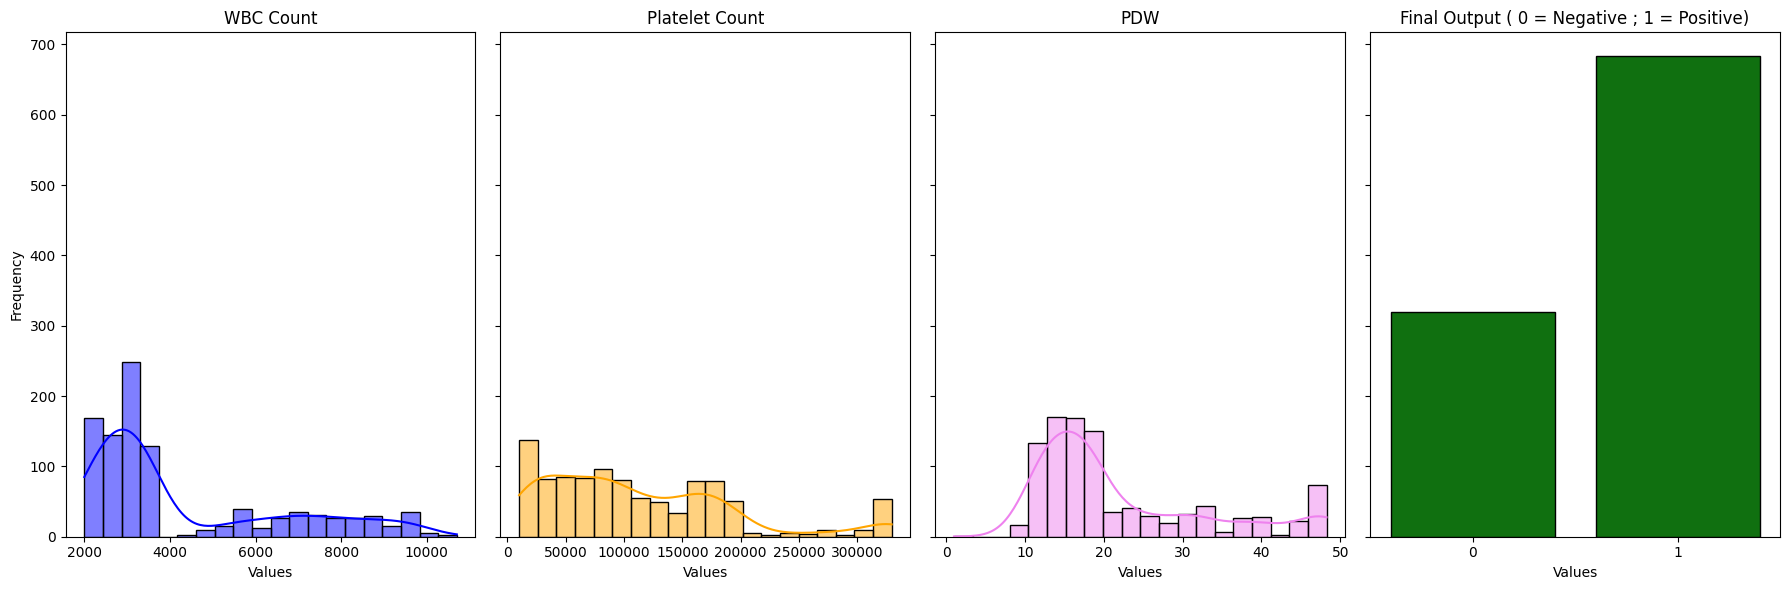

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Prepare data,
WBC_data = df_capped['WBC Count']
Platelet_Count_data = df_capped['Platelet Count']
PDW_data = df_capped['PDW']
Final_Output = df_capped['Final Output']

#Create the figure
fig, axs = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

#Plot WBC COUNT histogram
sns.histplot( WBC_data , bins=20, color='blue', edgecolor='black',kde = True, ax=axs[0])
axs[0].set_title('WBC Count')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

#Plot Platelet Count histogram
sns.histplot( Platelet_Count_data , bins=20, color='orange', edgecolor='black',kde = True, ax=axs[1])
axs[1].set_title('Platelet Count')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

#Plot WBC COUNT histogram
sns.histplot( PDW_data , bins=20, color='violet', edgecolor='black',kde = True, ax=axs[2])
axs[2].set_title('PDW')
axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')

#Plot Final Output countplot
sns.countplot( x = 'Final Output', data=df_capped , color='green', edgecolor='black', ax=axs[3])
axs[3].set_title('Final Output ( 0 = Negative ; 1 = Positive)')
axs[3].set_xlabel('Values')
axs[3].set_ylabel('Frequency')

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

   Age     Sex  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0   43    Male         12.6     2200.0                   1          1   
1   45    Male         13.2     3000.0                   0          1   
2   50  Female         11.0     3300.0                   1          1   
3   57  Female         11.9     3500.0                   1          0   
4   51  Female         13.0     3100.0                   0          1   

   Platelet Count   PDW  Final Output Age Group Platelet Count Category  \
0         62000.0  11.0             1     Adult                     Low   
1         17000.0  17.0             1     Adult                     Low   
2         19000.0  16.3             1     Adult                     Low   
3         29000.0  14.0             1     Adult                     Low   
4         30000.0  14.5             1     Adult                     Low   

  Hemoglobin Deficiency Status WBC Count Category PDW Risk Indicator  \
0                    Deficient        

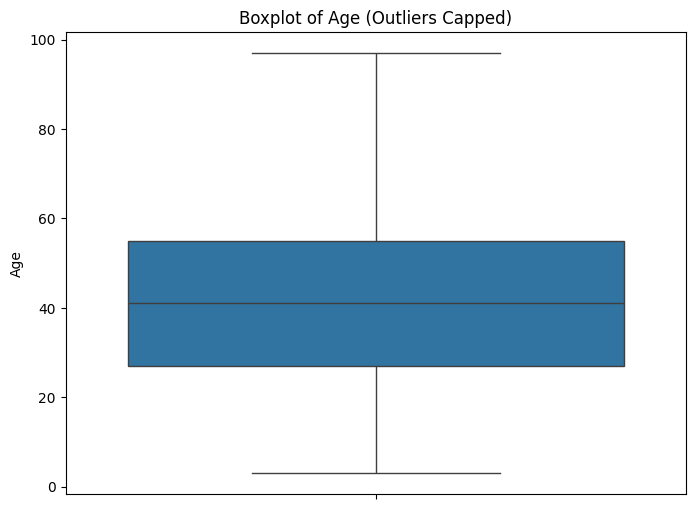

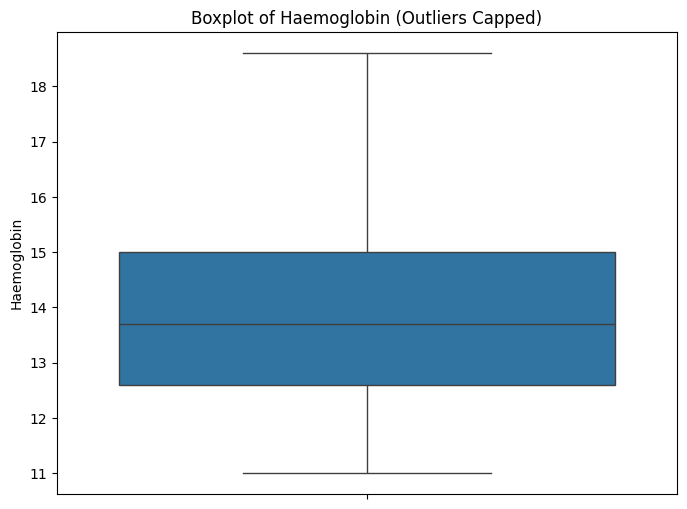

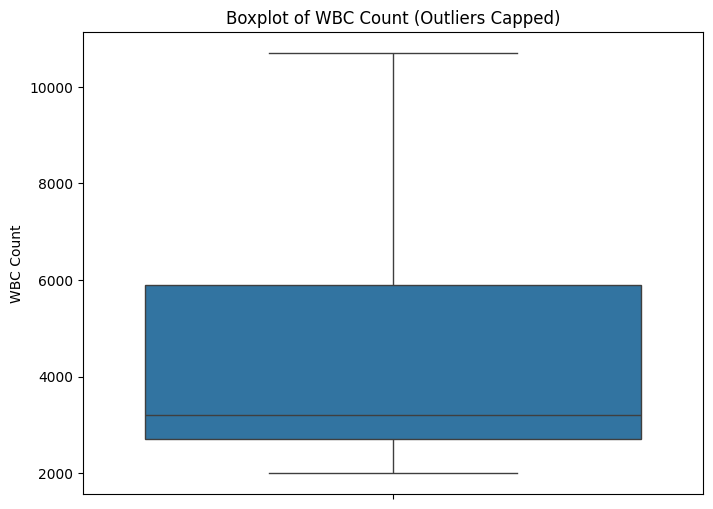

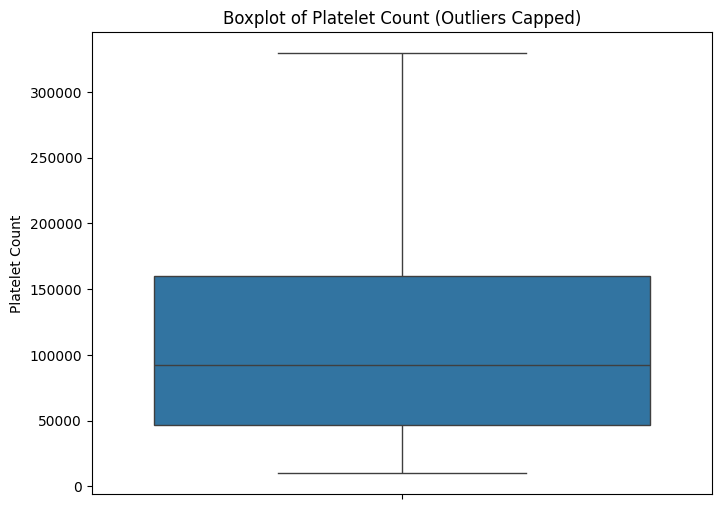

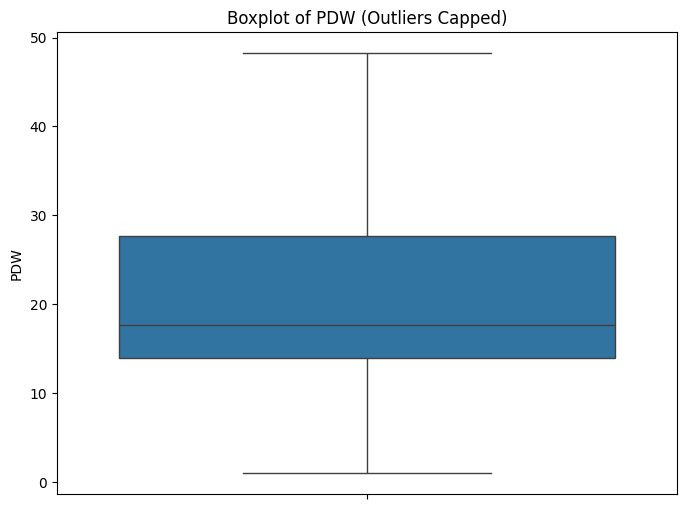

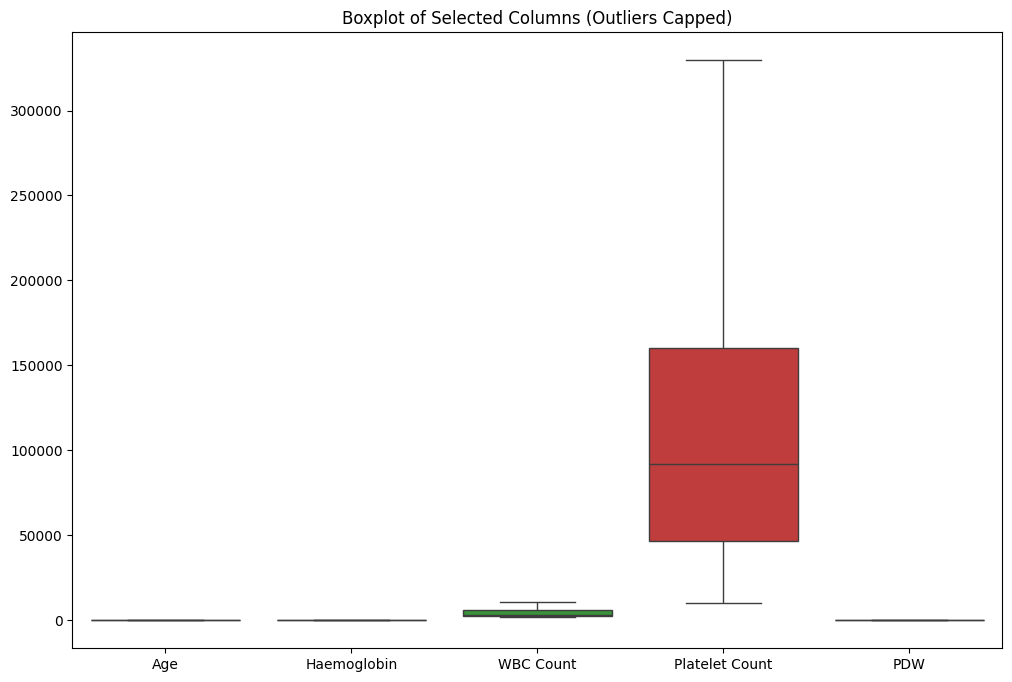

In [ ]:
import pandas as pd

# Function to cap outliers using IQR (Interquartile Range)
def cap_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for acceptable values
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds to the lower or upper threshold
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

# List of columns from which to cap outliers
columns_to_cap_outliers = ['Age', 'Haemoglobin', 'WBC Count', 'Platelet Count', 'PDW']

# Assuming df_rename is your original DataFrame, apply the cap_outliers function
df_rename = cap_outliers(df_rename, columns_to_cap_outliers)

# Display the first few rows of the capped DataFrame
print(df_rename.head())

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Generate individual boxplots for each column after capping outliers
for column in columns_to_cap_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df_rename[column])
    plt.title(f'Boxplot of {column} (Outliers Capped)')
    plt.show()

# Generate a combined boxplot for all selected columns after capping outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_rename[columns_to_cap_outliers])
plt.title('Boxplot of Selected Columns (Outliers Capped)')
plt.show()

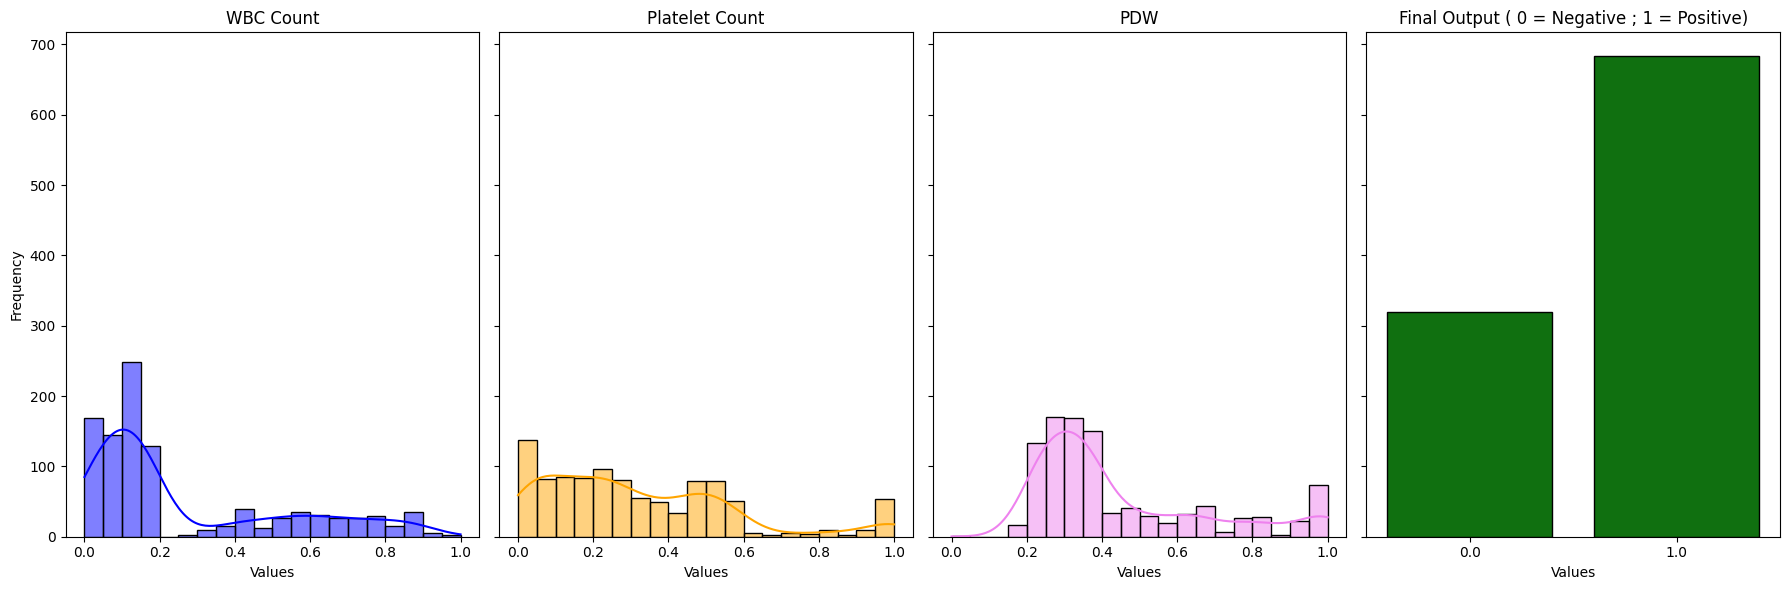

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Prepare data,
WBC_data = df_encoded['WBC Count']
Platelet_Count_data = df_encoded['Platelet Count']
PDW_data = df_encoded['PDW']
Final_Output = df_encoded['Final Output']

#Create the figure
fig, axs = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

#Plot WBC COUNT histogram
sns.histplot( WBC_data , bins=20, color='blue', edgecolor='black',kde = True, ax=axs[0])
axs[0].set_title('WBC Count')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

#Plot Platelet Count histogram
sns.histplot( Platelet_Count_data , bins=20, color='orange', edgecolor='black',kde = True, ax=axs[1])
axs[1].set_title('Platelet Count')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

#Plot WBC COUNT histogram
sns.histplot( PDW_data , bins=20, color='violet', edgecolor='black',kde = True, ax=axs[2])
axs[2].set_title('PDW')
axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')

#Plot Final Output countplot
sns.countplot( x = 'Final Output', data=df_encoded , color='green', edgecolor='black', ax=axs[3])
axs[3].set_title('Final Output ( 0 = Negative ; 1 = Positive)')
axs[3].set_xlabel('Values')
axs[3].set_ylabel('Frequency')

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
df_encoded['WBC Count'] = np.clip(df_encoded['WBC Count'], df_encoded['WBC Count'].quantile(0.01), df_encoded['WBC Count'].quantile(0.99))
df_encoded['Platelet Count'] = np.clip(df_encoded['Platelet Count'], df_encoded['Platelet Count'].quantile(0.01), df_encoded['Platelet Count'].quantile(0.99))
df_encoded['PDW'] = np.clip(df_encoded['PDW'], df_encoded['PDW'].quantile(0.01), df_encoded['PDW'].quantile(0.99))



df_encoded

Age  Sex  Haemoglobin  WBC Count  Differential Count  RBC PANEL  \
0     0.425532    2     0.210526   0.022989                 1.0        1.0   
1     0.446809    2     0.289474   0.114943                 0.0        1.0   
2     0.500000    1     0.000000   0.149425                 1.0        1.0   
3     0.574468    1     0.118421   0.172414                 1.0        0.0   
4     0.510638    1     0.263158   0.126437                 0.0        1.0   
...        ...  ...          ...        ...                 ...        ...   
998   0.255319    1     0.078947   0.850575                 1.0        1.0   
999   0.170213    1     0.631579   0.620690                 1.0        1.0   
1000  0.542553    1     0.118421   0.632184                 1.0        1.0   
1001  0.329787    2     0.473684   0.862069                 1.0        1.0   
1002  0.308511    2     0.236842   0.540230                 1.0        1.0   

      Platelet Count       PDW  Final Output  Age Group  \
0           0.162716  0.211640           1.0          0   
1           0.021904  0.338624           1.0          0   
2           0.028162  0.323810           1.0          0   
3           0.059454  0.275132           1.0          0   
4           0.062583  0.285714           1.0          0   
...              ...       ...           ...        ...   
998         1.000000  0.823280           0.0          3   
999         0.971791  1.000000           0.0          3   
1000        1.000000  0.918519           0.0          0   
1001        0.988813  0.865608           0.0          3   
1002        0.516311  1.000000           0.0          3   

      Platelet Count Category  Hemoglobin Deficiency Status  \
0                           0                             0   
1                           0                             2   
2                           0                             0   
3                           0                             0   
4                           0                             2   
...                       ...                           ...   
998                         1                             0   
999                         1                             2   
1000                        1                             0   
1001                        1                             2   
1002                        1                             0   

      WBC Count Category  PDW Risk Indicator  Composite Risk Score  
0                      0                   1                  0.75  
1                      0                   0                  0.75  
2                      0                   0                  1.00  
3                      0                   0                  1.00  
4                      0                   0                  0.75  
...                  ...                 ...                   ...  
998                    1                   0                  0.50  
999                    1                   0                  0.25  
1000                   1                   0                  0.50  
1001                   1                   0                  0.25  
1002                   1                   0                  0.50  

[1003 rows x 15 columns]

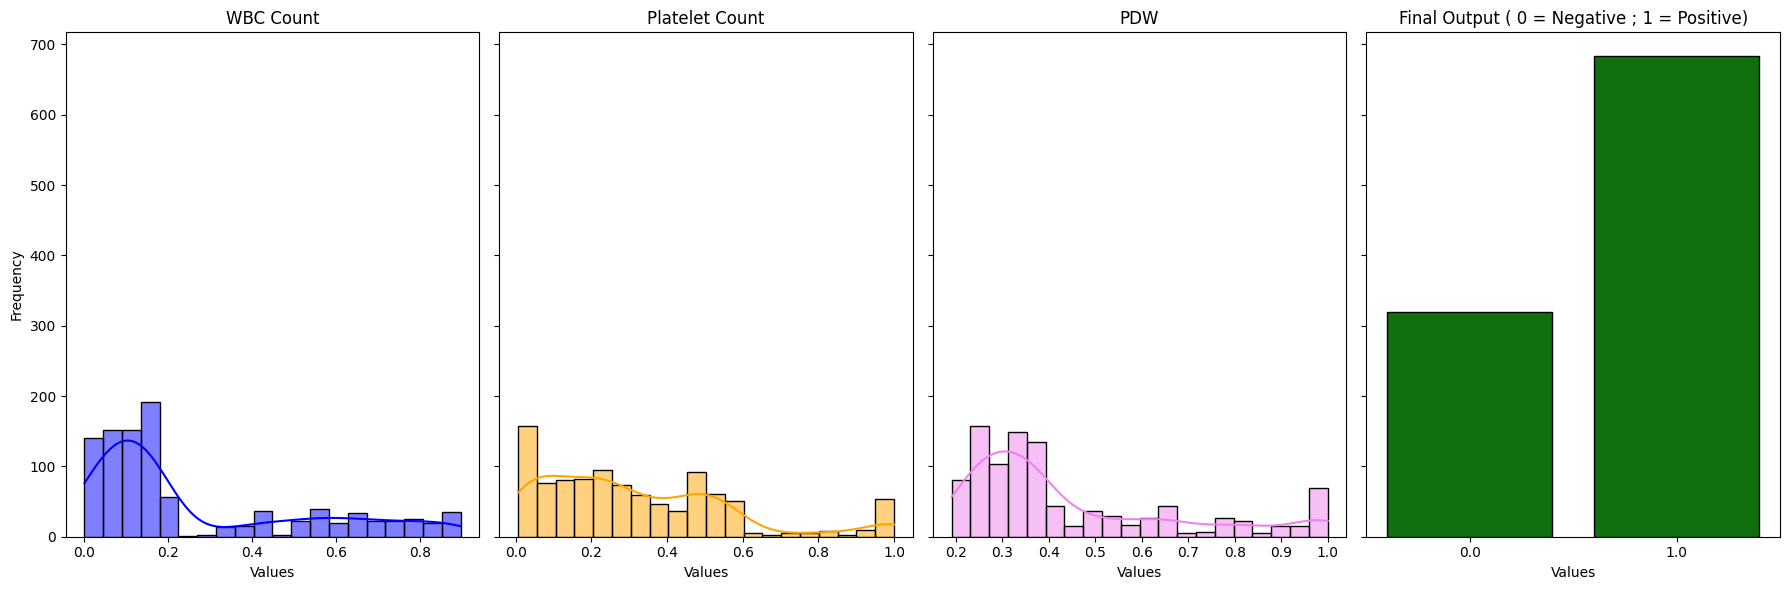

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Prepare data,
WBC_data = df_encoded['WBC Count']
Platelet_Count_data = df_encoded['Platelet Count']
PDW_data = df_encoded['PDW']
Final_Output = df_encoded['Final Output']

#Create the figure
fig, axs = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

#Plot WBC COUNT histogram
sns.histplot( WBC_data , bins=20, color='blue', edgecolor='black',kde = True, ax=axs[0])
axs[0].set_title('WBC Count')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

#Plot Platelet Count histogram
sns.histplot( Platelet_Count_data , bins=20, color='orange', edgecolor='black',kde = True, ax=axs[1])
axs[1].set_title('Platelet Count')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

#Plot WBC COUNT histogram
sns.histplot( PDW_data , bins=20, color='violet', edgecolor='black',kde = True, ax=axs[2])
axs[2].set_title('PDW')
axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')

#Plot Final Output countplot
sns.countplot( x = 'Final Output', data=df_encoded , color='green', edgecolor='black', ax=axs[3])
axs[3].set_title('Final Output ( 0 = Negative ; 1 = Positive)')
axs[3].set_xlabel('Values')
axs[3].set_ylabel('Frequency')

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
df_encoded.to_csv('df_encoded.csv', index=False)

In [ ]:
df_encoded['Final Output'].value_counts()

Final Output
1.0    683
0.0    320
Name: count, dtype: int64

In [ ]:
df_encoded['RBC PANEL'].value_counts()

RBC PANEL
1.0    940
0.0     63
Name: count, dtype: int64

In [ ]:
# Evaluate correlations and drop highly correlated features if necessary
correlation_matrix = df_encoded.corr()
correlation_matrix

Age       Sex  Haemoglobin  WBC Count  \
Age                           1.000000  0.181412    -0.097433   0.132925   
Sex                           0.181412  1.000000     0.177298  -0.019925   
Haemoglobin                  -0.097433  0.177298     1.000000  -0.004144   
WBC Count                     0.132925 -0.019925    -0.004144   1.000000   
Differential Count            0.057816  0.035573     0.032097   0.157607   
RBC PANEL                     0.049735 -0.004813    -0.014455   0.164086   
Platelet Count                0.063981 -0.025589     0.022033   0.753634   
PDW                          -0.176420  0.036504     0.134581   0.433230   
Final Output                 -0.160760  0.011723    -0.001696  -0.904252   
Age Group                    -0.224159  0.052171     0.019462   0.049367   
Platelet Count Category       0.170554 -0.010861     0.007072   0.871888   
Hemoglobin Deficiency Status -0.080289 -0.050617     0.701289  -0.032566   
WBC Count Category            0.160338 -0.021982    -0.004420   0.920066   
PDW Risk Indicator            0.160113 -0.037257    -0.086434   0.005201   
Composite Risk Score         -0.161215  0.052680    -0.253791  -0.753495   

                              Differential Count  RBC PANEL  Platelet Count  \
Age                                     0.057816   0.049735        0.063981   
Sex                                     0.035573  -0.004813       -0.025589   
Haemoglobin                             0.032097  -0.014455        0.022033   
WBC Count                               0.157607   0.164086        0.753634   
Differential Count                      1.000000  -0.015260        0.141013   
RBC PANEL                              -0.015260   1.000000        0.124178   
Platelet Count                          0.141013   0.124178        1.000000   
PDW                                     0.117369   0.116226        0.556552   
Final Output                           -0.175698  -0.177203       -0.805373   
Age Group                               0.026606  -0.029590        0.067689   
Platelet Count Category                 0.170477   0.171938        0.814736   
Hemoglobin Deficiency Status           -0.011003  -0.003988       -0.023539   
WBC Count Category                      0.172079   0.173554        0.791975   
PDW Risk Indicator                      0.010593  -0.017611       -0.063511   
Composite Risk Score                   -0.146789  -0.136505       -0.653511   

                                   PDW  Final Output  Age Group  \
Age                          -0.176420     -0.160760  -0.224159   
Sex                           0.036504      0.011723   0.052171   
Haemoglobin                   0.134581     -0.001696   0.019462   
WBC Count                     0.433230     -0.904252   0.049367   
Differential Count            0.117369     -0.175698   0.026606   
RBC PANEL                     0.116226     -0.177203  -0.029590   
Platelet Count                0.556552     -0.805373   0.067689   
PDW                           1.000000     -0.439941   0.034245   
Final Output                 -0.439941      1.000000  -0.080100   
Age Group                     0.034245     -0.080100   1.000000   
Platelet Count Category       0.440032     -0.961004   0.064406   
Hemoglobin Deficiency Status  0.028176      0.019870  -0.006614   
WBC Count Category            0.430648     -0.979405   0.076812   
PDW Risk Indicator           -0.469435     -0.029820   0.054943   
Composite Risk Score         -0.209910      0.833399  -0.079407   

                              Platelet Count Category  \
Age                                          0.170554   
Sex                                         -0.010861   
Haemoglobin                                  0.007072   
WBC Count                                    0.871888   
Differential Count                           0.170477   
RBC PANEL                                    0.171938   
Platelet Count                               0.814736   
PDW                     

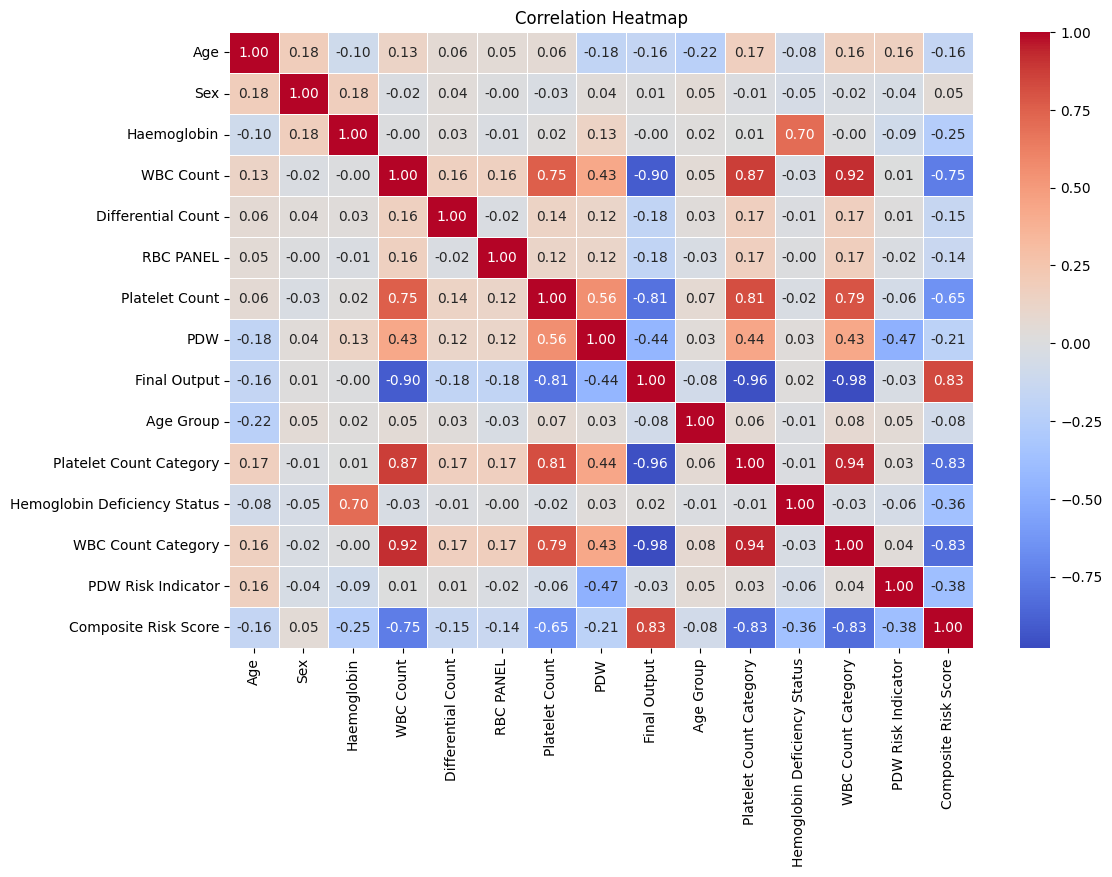

In [ ]:
#Calculate the correlation matrix for numerical features
corr_matrix = df_encoded.corr()

# Step 4: Generate a heatmap to visualize feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
high_corr = correlation_matrix.index[correlation_matrix["Final Output"] > 0]  # arbitrary threshold
high_corr

Index(['Sex', 'Final Output', 'Hemoglobin Deficiency Status',
       'Composite Risk Score'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to split the dataset into training and testing sets
def train_test_splitting(df, target_column):
    # Separate the target variable (y) and features (X)
    X = df.drop(target_column, axis=1)  # All other columns except the target
    y = df[target_column]  # Target column

    # Split the dataset into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X, y, X_train, X_test, y_train, y_test

# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy * 100:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")
    print(classification_report(y_test, y_pred))

# Function to train and evaluate multiple models
def modelClassification(X, y, X_train, X_test, y_train, y_test):

   # XGBoost
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    evaluate_model(y_test, y_pred_xgb, 'XGBoost')

    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    evaluate_model(y_test, y_pred_rf, 'Random Forest')

    # Support Vector Machine (SVM)
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    evaluate_model(y_test, y_pred_svm, 'SVM')

    # Logistic Regression
    lr_model = LogisticRegression(max_iter=1000, random_state=42)
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    evaluate_model(y_test, y_pred_lr, 'Logistic Regression')

    # Neural Network
    nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
    nn_model.fit(X_train, y_train)
    y_pred_nn = nn_model.predict(X_test)
    evaluate_model(y_test, y_pred_nn, 'Neural Network')

    return xgb_model



In [ ]:
X, y, X_train, X_test, y_train, y_test = train_test_splitting(df_encoded, 'Final Output')
xgb_model = modelClassification(X, y, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Confusion Matrix:
[[ 69   1]
 [  1 130]]
XGBoost Performance:
Accuracy: 99.0050
Precision: 0.9890
Recall: 0.9890
F1-Score: 0.9890

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        70
         1.0       0.99      0.99      0.99       131

    accuracy                           0.99       201
   macro avg       0.99      0.99      0.99       201
weighted avg       0.99      0.99      0.99       201

Model: Random Forest
Confusion Matrix:
[[ 69   1]
 [  1 130]]
Random Forest Performance:
Accuracy: 99.0050
Precision: 0.9890
Recall: 0.9890
F1-Score: 0.9890

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        70
         1.0       0.99      0.99      0.99       131

    accuracy                           0.99       201
   macro avg       0.99      0.99      0.99       201
weighted avg       0.99      0.99      0.99       201

Model: SVM
Confusion Matrix:
[[ 69   1]
 [

In [ ]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=84af132df84079d3b2020850a19b30e539501d8cddc1a0cbac8f37770d8563b7
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import shap

import xgboost as xgb
from lime import lime_tabular

In [ ]:
shap.initjs()
# Create the SHAP explainer and calculate SHAP values
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Visualize the first prediction's explanation
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0,:], X_train.iloc[0,:])

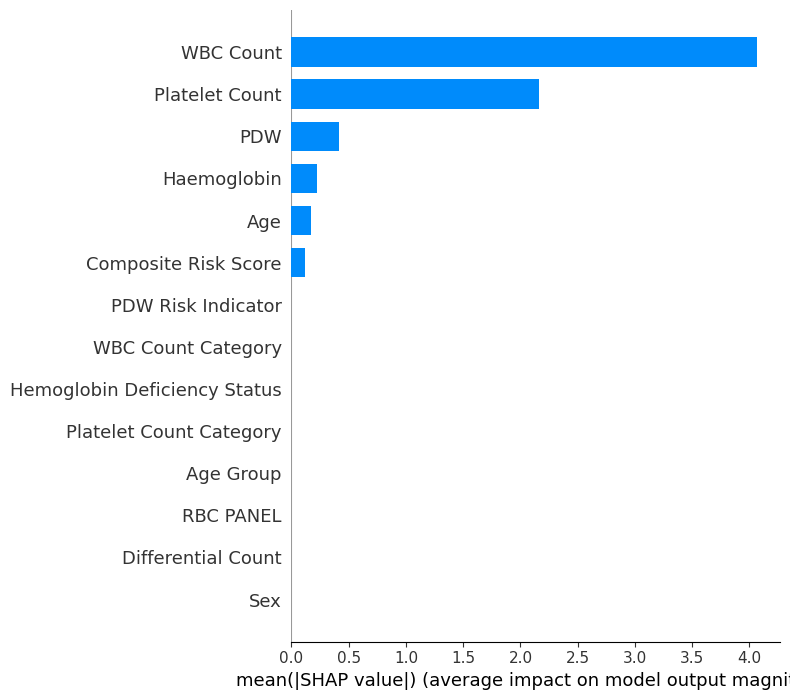

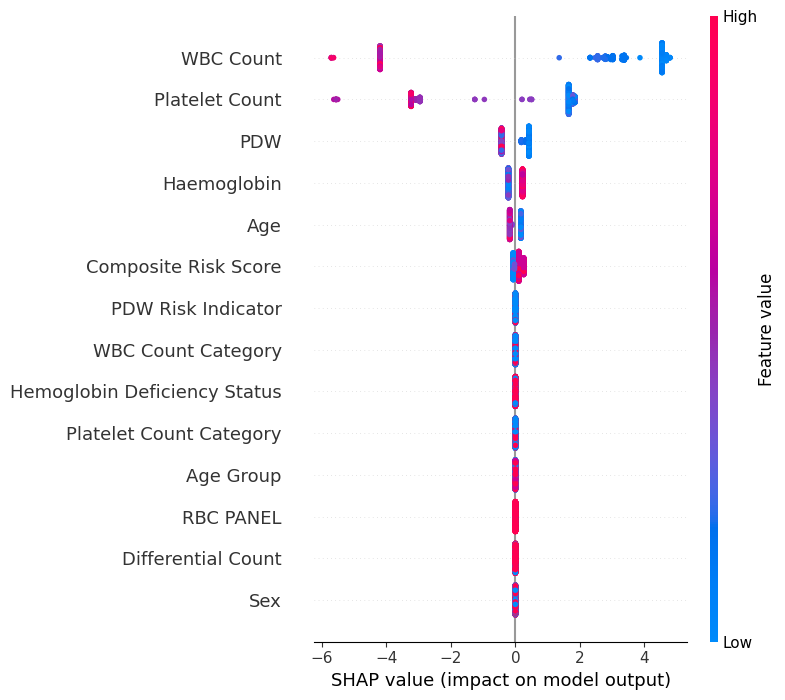

In [ ]:
# Create the SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# You can also create a detailed SHAP summary plot (beeswarm plot) to see the distribution
shap.summary_plot(shap_values, X_train, plot_type='dot')

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


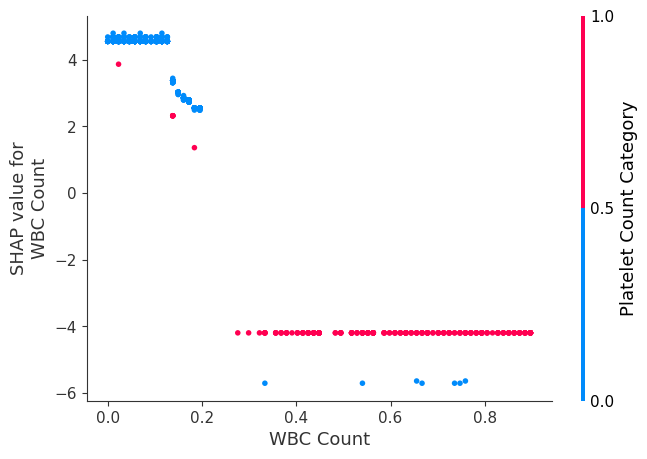

In [ ]:
# Assuming the XGBoost model and data are already defined and loaded: xgb_model, X_train

# Create the SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP dependence plot for a specific feature
# The following example assumes 'feature_name' is the name of the feature you're interested in
feature_name = 'WBC Count'  # Replace 'example_feature_name' with your actual feature of interest

# Select a feature for coloring to show interactions; if not sure, let SHAP choose one
interaction_index = 'auto'  # Set to 'auto' or specify another feature name

shap.dependence_plot(ind=feature_name, shap_values=shap_values, features=X_train, interaction_index=interaction_index)

# Explanation:
# Each point on the plot represents a single datapoint in the dataset.
# The x-axis shows the value of the feature, and the y-axis shows the SHAP value for that feature.
# The color represents the value of the interacting feature, providing insight into how two features interact to impact the model output.

In [ ]:
# Assume X_train, y_train are already defined and the XGBoost model is trained:
# xgb_model = xgb.XGBClassifier(...)
# xgb_model.fit(X_train, y_train)

# Create a LIME explainer object
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Dengue Negative', 'Dengue Positive'],  # Adjust based on your target classes
    mode='classification'
)

# Select the instance to explain
i = 1  # Index of the instance in the test set
instance = X_train.iloc[i]

# Generate explanations
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_model.predict_proba
)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# Explanation:
# This will generate an HTML output showing the contribution of each feature to the prediction of the selected instance.

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [ ]:
X, y, X_train, X_test, y_train, y_test = train_test_splitting(df_encoded, 'RBC PANEL')
xgb_model = modelClassification(X, y, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:10:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Confusion Matrix:
[[  2  12]
 [  1 186]]
XGBoost Performance:
Accuracy: 93.5323
Precision: 0.8030
Recall: 0.5688
F1-Score: 0.6008

              precision    recall  f1-score   support

         0.0       0.67      0.14      0.24        14
         1.0       0.94      0.99      0.97       187

    accuracy                           0.94       201
   macro avg       0.80      0.57      0.60       201
weighted avg       0.92      0.94      0.92       201

Model: Random Forest
Confusion Matrix:
[[  0  14]
 [  0 187]]
Random Forest Performance:
Accuracy: 93.0348
Precision: 0.4652
Recall: 0.5000
F1-Score: 0.4820

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.93      1.00      0.96       187

    accuracy                           0.93       201
   macro avg       0.47      0.50      0.48       201
weighted avg       0.87      0.93      0.90       201

Model: SVM
Confusion Matrix:
[[  0  14]
 [

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Model: Neural Network
Confusion Matrix:
[[  0  14]
 [  0 187]]
Neural Network Performance:
Accuracy: 93.0348
Precision: 0.4652
Recall: 0.5000
F1-Score: 0.4820

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.93      1.00      0.96       187

    accuracy                           0.93       201
   macro avg       0.47      0.50      0.48       201
weighted avg       0.87      0.93      0.90       201



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
shap.initjs()
# Create the SHAP explainer and calculate SHAP values
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Visualize the first prediction's explanation
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0,:], X_train.iloc[0,:])

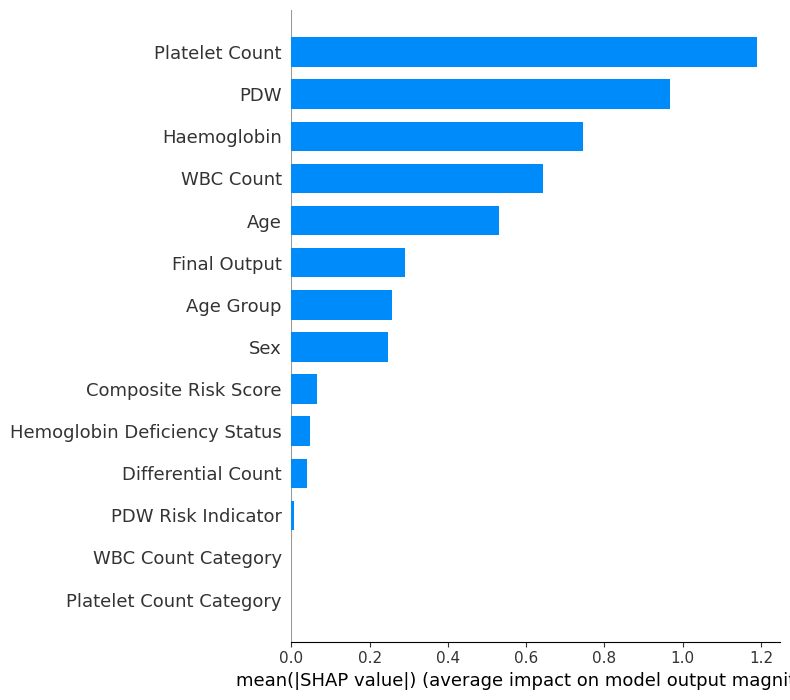

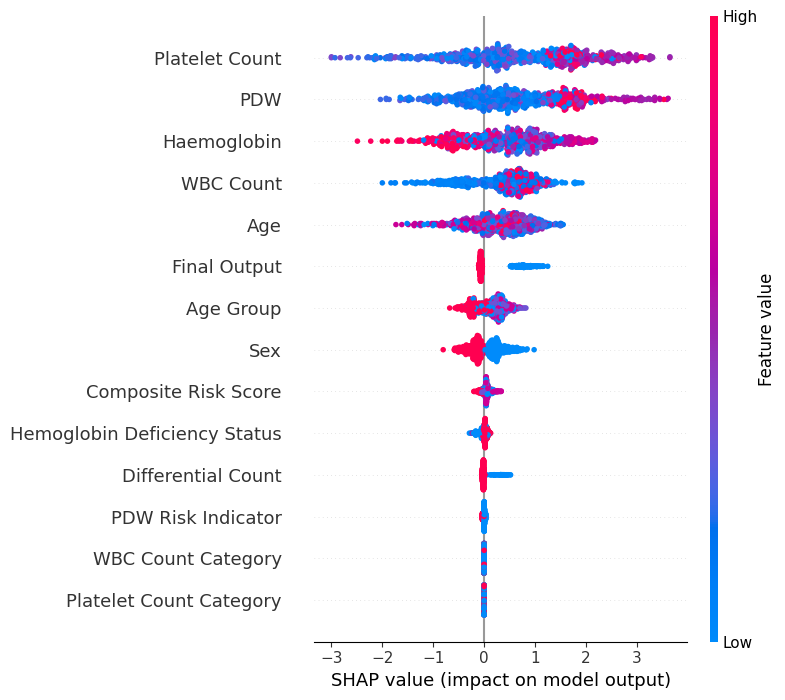

In [ ]:
# Create the SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# You can also create a detailed SHAP summary plot (beeswarm plot) to see the distribution
shap.summary_plot(shap_values, X_train, plot_type='dot')

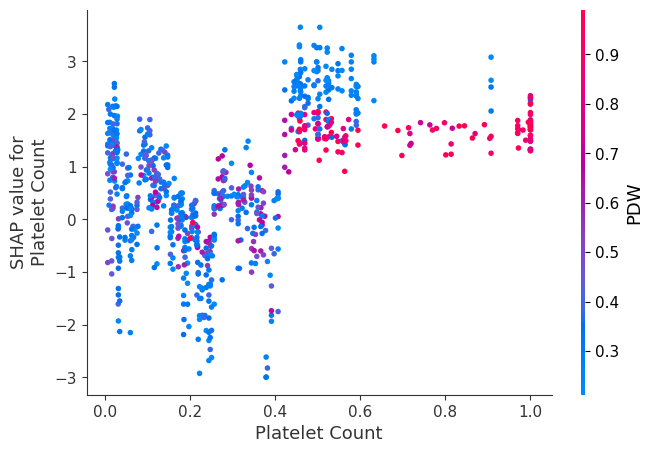

In [ ]:
# Assuming the XGBoost model and data are already defined and loaded: xgb_model, X_train

# Create the SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP dependence plot for a specific feature
# The following example assumes 'feature_name' is the name of the feature you're interested in
feature_name = 'Platelet Count'  # Replace 'example_feature_name' with your actual feature of interest

# Select a feature for coloring to show interactions; if not sure, let SHAP choose one
interaction_index = 'auto'  # Set to 'auto' or specify another feature name

shap.dependence_plot(ind=feature_name, shap_values=shap_values, features=X_train, interaction_index=interaction_index)

# Explanation:
# Each point on the plot represents a single datapoint in the dataset.
# The x-axis shows the value of the feature, and the y-axis shows the SHAP value for that feature.
# The color represents the value of the interacting feature, providing insight into how two features interact to impact the model output.

In [ ]:
# Assume X_train, y_train are already defined and the XGBoost model is trained:
# xgb_model = xgb.XGBClassifier(...)
# xgb_model.fit(X_train, y_train)

# Create a LIME explainer object
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Abnormal', 'Normal'],  # Adjust based on your target classes
    mode='classification'
)

# Select the instance to explain
i = 1  # Index of the instance in the test set
instance = X_train.iloc[i]

# Generate explanations
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_model.predict_proba
)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# Explanation:
# This will generate an HTML output showing the contribution of each feature to the prediction of the selected instance.

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.